Firstly I would like to thank Opta and FBRef for providing me with the relevant data required about the teams which allowed me to perform my analysis and build a custom algorithm around the data

# Imports and Scrapping


So first I had to import requests which allows me to send HTTP requests using Python and get the required URL. Then I imported BeautifulSoup which I used for web scrapping the data and creating a dataframe from it


In [1]:
import requests

In [2]:
inter_url = 'https://fbref.com/en/squads/d609edc0/2022-2023/all_comps/Internazionale-Stats-All-Competitions'

In [3]:
interdata = requests.get(inter_url)

In [4]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
intersoup = BeautifulSoup(interdata.text)

# PreProcessing

I imported and used pandas to convert the html text into a dataframe

In [6]:
import pandas as pd

In [7]:
matches = pd.read_html(interdata.text, match = 'Scores & Fixtures')[0]

In [8]:
matches

Date   Time                 Comp                Round  Day    Venue  \
0   2022-08-13  20:45              Serie A          Matchweek 1  Sat     Away   
1   2022-08-20  20:45              Serie A          Matchweek 2  Sat     Home   
2   2022-08-26  20:45              Serie A          Matchweek 3  Fri     Away   
3   2022-08-30  20:45              Serie A          Matchweek 4  Tue     Home   
4   2022-09-03  18:00              Serie A          Matchweek 5  Sat     Away   
5   2022-09-07  21:00         Champions Lg          Group stage  Wed     Home   
6   2022-09-10  18:00              Serie A          Matchweek 6  Sat     Home   
7   2022-09-13  18:45         Champions Lg          Group stage  Tue     Away   
8   2022-09-18  12:30              Serie A          Matchweek 7  Sun     Away   
9   2022-10-01  18:00              Serie A          Matchweek 8  Sat     Home   
10  2022-10-04  21:00         Champions Lg          Group stage  Tue     Home   
11  2022-10-08  15:00              Serie A          Matchweek 9  Sat     Away   
12  2022-10-12  21:00         Champions Lg          Group stage  Wed     Away   
13  2022-10-16  12:30              Serie A         Matchweek 10  Sun     Home   
14  2022-10-22  20:45              Serie A         Matchweek 11  Sat     Away   
15  2022-10-26  18:45         Champions Lg          Group stage  Wed     Home   
16  2022-10-29  20:45              Serie A         Matchweek 12  Sat     Home   
17  2022-11-01  21:00         Champions Lg          Group stage  Tue     Away   
18  2022-11-06  20:45              Serie A         Matchweek 13  Sun     Away   
19  2022-11-09  20:45              Serie A         Matchweek 14  Wed     Home   
20  2022-11-13  12:30              Serie A         Matchweek 15  Sun     Away   
21  2023-01-04  20:45              Serie A         Matchweek 16  Wed     Home   
22  2023-01-07  20:45              Serie A         Matchweek 17  Sat     Away   
23  2023-01-10  21:00         Coppa Italia          Round of 16  Tue     Home   
24  2023-01-14  20:45              Serie A         Matchweek 18  Sat     Home   
25  2023-01-18  22:00  Supercoppa Italiana  Supercoppa Italiana  Wed     Away   
26  2023-01-23  20:45              Serie A         Matchweek 19  Mon     Home   
27  2023-01-28  18:00              Serie A         Matchweek 20  Sat     Away   
28  2023-01-31  21:00         Coppa Italia       Quarter-finals  Tue     Home   
29  2023-02-05  20:45              Serie A         Matchweek 21  Sun     Home   
30  2023-02-13  20:45              Serie A         Matchweek 22  Mon     Away   
31  2023-02-18  20:45              Serie A         Matchweek 23  Sat     Home   
32  2023-02-22  21:00         Champions Lg          Round of 16  Wed     Home   
33  2023-02-26  12:30              Serie A         Matchweek 24  Sun     Away   
34  2023-03-05  18:00              Serie A         Matchweek 25  Sun     Home   
35  2023-03-10  20:45              Serie A         Matchweek 26  Fri     Away   
36  2023-03-14  20:00         Champions Lg          Round of 16  Tue     Away   
37  2023-03-19  20:45              Serie A         Matchweek 27  Sun     Home   
38  2023-04-01  18:00              Serie A         Matchweek 28  Sat     Home   
39  2023-04-04  21:00         Coppa Italia          Semi-finals  Tue     Away   
40  2023-04-07  17:00              Serie A         Matchweek 29  Fri     Away   
41  2023-04-11  20:00         Champions Lg       Quarter-finals  Tue     Away   
42  2023-04-15  20:45              Serie A         Matchweek 30  Sat     Home   
43  2023-04-19  21:00         Champions Lg       Quarter-finals  Wed     Home   
44  2023-04-23  12:30              Serie A         Matchweek 31  Sun     Away   
45  2023-04-26  21:00         Coppa Italia          Semi-finals  Wed     Home   
46  2023-04-30  12:30              Serie A         Matchweek 32  Sun     Home   
47  2023-05-03  21:00              Serie A         Matchweek 33  Wed     Away   
48  2023-05-06  18:00              Serie 

In [9]:
intersoup = BeautifulSoup(interdata.text)


In [10]:
shootinginter_data = requests.get('https://fbref.com/en/squads/d609edc0/2022-2023/matchlogs/all_comps/shooting/Internazionale-Match-Logs-All-Competitions')

In [11]:
shooting_inter = pd.read_html(shootinginter_data.text, match = 'Shooting')[0]

In [12]:
shooting_inter

For Internazionale                                                        \
                 Date   Time                 Comp                Round  Day   
0          2022-08-13  20:45              Serie A          Matchweek 1  Sat   
1          2022-08-20  20:45              Serie A          Matchweek 2  Sat   
2          2022-08-26  20:45              Serie A          Matchweek 3  Fri   
3          2022-08-30  20:45              Serie A          Matchweek 4  Tue   
4          2022-09-03  18:00              Serie A          Matchweek 5  Sat   
5          2022-09-07  21:00         Champions Lg          Group stage  Wed   
6          2022-09-10  18:00              Serie A          Matchweek 6  Sat   
7          2022-09-13  18:45         Champions Lg          Group stage  Tue   
8          2022-09-18  12:30              Serie A          Matchweek 7  Sun   
9          2022-10-01  18:00              Serie A          Matchweek 8  Sat   
10         2022-10-04  21:00         Champions Lg          Group stage  Tue   
11         2022-10-08  15:00              Serie A          Matchweek 9  Sat   
12         2022-10-12  21:00         Champions Lg          Group stage  Wed   
13         2022-10-16  12:30              Serie A         Matchweek 10  Sun   
14         2022-10-22  20:45              Serie A         Matchweek 11  Sat   
15         2022-10-26  18:45         Champions Lg          Group stage  Wed   
16         2022-10-29  20:45              Serie A         Matchweek 12  Sat   
17         2022-11-01  21:00         Champions Lg          Group stage  Tue   
18         2022-11-06  20:45              Serie A         Matchweek 13  Sun   
19         2022-11-09  20:45              Serie A         Matchweek 14  Wed   
20         2022-11-13  12:30              Serie A         Matchweek 15  Sun   
21         2023-01-04  20:45              Serie A         Matchweek 16  Wed   
22         2023-01-07  20:45              Serie A         Matchweek 17  Sat   
23         2023-01-10  21:00         Coppa Italia          Round of 16  Tue   
24         2023-01-14  20:45              Serie A         Matchweek 18  Sat   
25         2023-01-18  22:00  Supercoppa Italiana  Supercoppa Italiana  Wed   
26         2023-01-23  20:45              Serie A         Matchweek 19  Mon   
27         2023-01-28  18:00              Serie A         Matchweek 20  Sat   
28         2023-01-31  21:00         Coppa Italia       Quarter-finals  Tue   
29         2023-02-05  20:45              Serie A         Matchweek 21  Sun   
30         2023-02-13  20:45              Serie A         Matchweek 22  Mon   
31         2023-02-18  20:45              Serie A         Matchweek 23  Sat   
32         2023-02-22  21:00         Champions Lg          Round of 16  Wed   
33         2023-02-26  12:30              Serie A         Matchweek 24  Sun   
34         2023-03-05  18:00              Serie A         Matchweek 25  Sun   
35         2023-03-10  20:45              Serie A         Matchweek 26  Fri   
36         2023-03-14  20:00         Champions Lg          Round of 16  Tue   
37         2023-03-19  20:45              Serie A         Matchweek 27  Sun   
38         2023-04-01  18:00              Serie A         Matchweek 28  Sat   
39         2023-04-04  21:00         Coppa Italia          Semi-finals  Tue   
40         2023-04-07  17:00              Serie A         Matchweek 29  Fri   
41         2023-04-11  20:00         Champions Lg       Quarter-finals  Tue   
42         2023-04-15  20:45              Serie A         Matchweek 30  Sat   
43         2023-04-19  21:00         Champions Lg       Quarter-finals  Wed   
44         2023-04-23  12:30              Serie A         Matchweek 31  Sun   
45         2023-04-26  21:00         Coppa Italia          Semi-finals  Wed   
46         2023-04-30  12:30              Serie A         Matchweek 32  Sun   
47         2023-05-03  21:00              Serie A         Matchweek 33  Wed   
48         2023-05-06  18:00              Serie A    

In [13]:
shooting_inter.columns = shooting_inter.columns.droplevel()

In [14]:
interteam = matches.merge(shooting_inter[['Date','Gls','SoT%','Dist','xG']], on = 'Date')

Created a ***'interteam'*** dataframe by combining a ***'matches'*** data frame consisting of the scores and fixtures of InterMilan and ***'shooting_inter'*** dataframe which consists of the shooting stats of this football club like **SoT%** (Shots on target%), **Dist** (Distance from which shot was taken), **xG **(expectedGoals) etc which might affect the outcome of the game. I had initially taken a few more parameters but I removed them since they were less correlated and it made the dataset more complex

In [15]:
interteam

Date   Time                 Comp                Round  Day    Venue  \
0   2022-08-13  20:45              Serie A          Matchweek 1  Sat     Away   
1   2022-08-20  20:45              Serie A          Matchweek 2  Sat     Home   
2   2022-08-26  20:45              Serie A          Matchweek 3  Fri     Away   
3   2022-08-30  20:45              Serie A          Matchweek 4  Tue     Home   
4   2022-09-03  18:00              Serie A          Matchweek 5  Sat     Away   
5   2022-09-07  21:00         Champions Lg          Group stage  Wed     Home   
6   2022-09-10  18:00              Serie A          Matchweek 6  Sat     Home   
7   2022-09-13  18:45         Champions Lg          Group stage  Tue     Away   
8   2022-09-18  12:30              Serie A          Matchweek 7  Sun     Away   
9   2022-10-01  18:00              Serie A          Matchweek 8  Sat     Home   
10  2022-10-04  21:00         Champions Lg          Group stage  Tue     Home   
11  2022-10-08  15:00              Serie A          Matchweek 9  Sat     Away   
12  2022-10-12  21:00         Champions Lg          Group stage  Wed     Away   
13  2022-10-16  12:30              Serie A         Matchweek 10  Sun     Home   
14  2022-10-22  20:45              Serie A         Matchweek 11  Sat     Away   
15  2022-10-26  18:45         Champions Lg          Group stage  Wed     Home   
16  2022-10-29  20:45              Serie A         Matchweek 12  Sat     Home   
17  2022-11-01  21:00         Champions Lg          Group stage  Tue     Away   
18  2022-11-06  20:45              Serie A         Matchweek 13  Sun     Away   
19  2022-11-09  20:45              Serie A         Matchweek 14  Wed     Home   
20  2022-11-13  12:30              Serie A         Matchweek 15  Sun     Away   
21  2023-01-04  20:45              Serie A         Matchweek 16  Wed     Home   
22  2023-01-07  20:45              Serie A         Matchweek 17  Sat     Away   
23  2023-01-10  21:00         Coppa Italia          Round of 16  Tue     Home   
24  2023-01-14  20:45              Serie A         Matchweek 18  Sat     Home   
25  2023-01-18  22:00  Supercoppa Italiana  Supercoppa Italiana  Wed     Away   
26  2023-01-23  20:45              Serie A         Matchweek 19  Mon     Home   
27  2023-01-28  18:00              Serie A         Matchweek 20  Sat     Away   
28  2023-01-31  21:00         Coppa Italia       Quarter-finals  Tue     Home   
29  2023-02-05  20:45              Serie A         Matchweek 21  Sun     Home   
30  2023-02-13  20:45              Serie A         Matchweek 22  Mon     Away   
31  2023-02-18  20:45              Serie A         Matchweek 23  Sat     Home   
32  2023-02-22  21:00         Champions Lg          Round of 16  Wed     Home   
33  2023-02-26  12:30              Serie A         Matchweek 24  Sun     Away   
34  2023-03-05  18:00              Serie A         Matchweek 25  Sun     Home   
35  2023-03-10  20:45              Serie A         Matchweek 26  Fri     Away   
36  2023-03-14  20:00         Champions Lg          Round of 16  Tue     Away   
37  2023-03-19  20:45              Serie A         Matchweek 27  Sun     Home   
38  2023-04-01  18:00              Serie A         Matchweek 28  Sat     Home   
39  2023-04-04  21:00         Coppa Italia          Semi-finals  Tue     Away   
40  2023-04-07  17:00              Serie A         Matchweek 29  Fri     Away   
41  2023-04-11  20:00         Champions Lg       Quarter-finals  Tue     Away   
42  2023-04-15  20:45              Serie A         Matchweek 30  Sat     Home   
43  2023-04-19  21:00         Champions Lg       Quarter-finals  Wed     Home   
44  2023-04-23  12:30              Serie A         Matchweek 31  Sun     Away   
45  2023-04-26  21:00         Coppa Italia          Semi-finals  Wed     Home   
46  2023-04-30  12:30              Serie A         Matchweek 32  Sun     Home   
47  2023-05-03  21:00              Serie A         Matchweek 33  Wed     Away   
48  2023-05-06  18:00              Serie 

Dropped irrelevant data columns

In [16]:
interteam = interteam.drop(['Date', 'Time','Round','Day','Opponent','Attendance','Referee','Match Report','Notes','xG_y'], axis=1)

In [17]:
interteam

Comp    Venue Result   GF   GA  xG_x  xGA  Poss  \
0               Serie A     Away      W  2.0  1.0   2.1  0.7  70.0   
1               Serie A     Home      W  3.0  0.0   2.1  0.5  54.0   
2               Serie A     Away      L  1.0  3.0   1.5  1.1  52.0   
3               Serie A     Home      W  3.0  1.0   2.2  1.2  53.0   
4               Serie A     Away      L  2.0  3.0   1.8  1.3  53.0   
5          Champions Lg     Home      L  0.0  2.0   0.7  2.5  44.0   
6               Serie A     Home      W  1.0  0.0   1.5  0.7  57.0   
7          Champions Lg     Away      W  2.0  0.0   1.9  0.3  71.0   
8               Serie A     Away      L  1.0  3.0   1.1  1.6  56.0   
9               Serie A     Home      L  1.0  2.0   1.0  1.0  58.0   
10         Champions Lg     Home      W  1.0  0.0   0.2  0.5  29.0   
11              Serie A     Away      W  2.0  1.0   2.3  1.2  48.0   
12         Champions Lg     Away      D  3.0  3.0   2.0  2.2  39.0   
13              Serie A     Home      W  2.0  0.0   1.7  0.4  61.0   
14              Serie A     Away      W  4.0  3.0   2.4  1.3  42.0   
15         Champions Lg     Home      W  4.0  0.0   3.2  0.1  63.0   
16              Serie A     Home      W  3.0  0.0   2.0  0.5  51.0   
17         Champions Lg     Away      L  0.0  2.0   0.7  1.5  40.0   
18              Serie A     Away      L  0.0  2.0   1.2  0.9  53.0   
19              Serie A     Home      W  6.0  1.0   2.6  0.7  57.0   
20              Serie A     Away      W  3.0  2.0   2.2  1.8  53.0   
21              Serie A     Home      W  1.0  0.0   1.4  0.9  36.0   
22              Serie A     Away      D  2.0  2.0   1.7  1.5  46.0   
23         Coppa Italia     Home      W  2.0  1.0   NaN  NaN  72.0   
24              Serie A     Home      W  1.0  0.0   0.7  0.3  57.0   
25  Supercoppa Italiana     Away      W  3.0  0.0   NaN  NaN  35.0   
26              Serie A     Home      L  0.0  1.0   1.4  0.8  49.0   
27              Serie A     Away      W  2.0  1.0   2.3  1.0  65.0   
28         Coppa Italia     Home      W  1.0  0.0   NaN  NaN  51.0   
29              Serie A     Home      W  1.0  0.0   0.9  0.3  64.0   
30              Serie A     Away      D  0.0  0.0   1.8  0.5  65.0   
31              Serie A     Home      W  3.0  1.0   2.7  0.8  59.0   
32         Champions Lg     Home      W  1.0  0.0   1.5  1.6  60.0   
33              Serie A     Away      L  0.0  1.0   1.0  1.2  52.0   
34              Serie A     Home      W  2.0  0.0   0.8  0.6  62.0   
35              Serie A     Away      L  1.0  2.0   3.8  1.0  69.0   
36         Champions Lg     Away      D  0.0  0.0   0.5  1.7  33.0   
37              Serie A     Home      L  0.0  1.0   1.2  0.6  69.0   
38              Serie A     Home      L  0.0  1.0   2.8  1.1  59.0   
39         Coppa Italia     Away      D  1.0  1.0   NaN  NaN  62.0   
40              Serie A     Away      D  1.0  1.0   2.8  1.1  56.0   
41         Champions Lg     Away      W  2.0  0.0   1.4  1.6  43.0   
42              Serie A     Home      L  0.0  1.0   2.1  0.7  56.0   
43         Champions Lg     Home      D  3.0  3.0   1.2  0.7  40.0   
44              Serie A     Away      W  3.0  0.0   1.1  0.9  60.0   
45         Coppa Italia     Home      W  1.0  0.0   NaN  NaN  41.0   
46              Serie A     Home      W  3.0  1.0   3.1  0.8  62.0   
47              Serie A     Away      W  6.0  0.0   2.4  0.5  74.0   
48              Serie A     Away      W  2.0  0.0   0.7  0.9  49.0   
49         Champions Lg     Away      W  2.0  0.0   2.0  0.9  42.0   
50              Serie A     Home      W  4.0  2.0   1.4  2.3  51.0   
51         Champions Lg     Home      W  1.0  0.0   1.0  0.5  44.0   
52              Serie A     Away      L  1.0  3.0   0.6  1.7  30.0   
53         Coppa Italia  Neutral      W  2.0  1.0   NaN  NaN  49.0   
54              Serie A     Home      W  3.0  2.0   2.8  0.9  51.0   

              Captain Formation  Gls  SoT%  Dist  
0    Samir Handanović     3-5-2    2  47.4  17.

Found out null values and replaced them with mean values of their respective columns

In [18]:
interteam.isnull().sum()

Comp         0
Venue        0
Result       0
GF           0
GA           0
xG_x         6
xGA          6
Poss         0
Captain      0
Formation    0
Gls          0
SoT%         0
Dist         6
dtype: int64

In [19]:
interteam.describe()


GF         GA       xG_x        xGA       Poss        Gls  \
count  55.000000  55.000000  49.000000  49.000000  55.000000  55.000000   
mean    1.800000   1.000000   1.704082   1.008163  53.036364   1.745455   
std     1.419442   1.054093   0.801550   0.539999  10.932391   1.336360   
min     0.000000   0.000000   0.200000   0.100000  29.000000   0.000000   
25%     1.000000   0.000000   1.100000   0.600000  45.000000   1.000000   
50%     2.000000   1.000000   1.700000   0.900000  53.000000   2.000000   
75%     3.000000   2.000000   2.200000   1.300000  60.500000   3.000000   
max     6.000000   3.000000   3.800000   2.500000  74.000000   6.000000   

            SoT%       Dist  
count  55.000000  49.000000  
mean   33.660000  16.938776  
std    14.336713   2.544178  
min     6.300000  11.800000  
25%    24.500000  14.600000  
50%    31.300000  16.900000  
75%    40.450000  18.800000  
max    85.700000  23.100000

In [20]:
interteam["xG_x"].fillna(interteam["xG_x"].mean(), inplace = True)
interteam

Comp    Venue Result   GF   GA      xG_x  xGA  Poss  \
0               Serie A     Away      W  2.0  1.0  2.100000  0.7  70.0   
1               Serie A     Home      W  3.0  0.0  2.100000  0.5  54.0   
2               Serie A     Away      L  1.0  3.0  1.500000  1.1  52.0   
3               Serie A     Home      W  3.0  1.0  2.200000  1.2  53.0   
4               Serie A     Away      L  2.0  3.0  1.800000  1.3  53.0   
5          Champions Lg     Home      L  0.0  2.0  0.700000  2.5  44.0   
6               Serie A     Home      W  1.0  0.0  1.500000  0.7  57.0   
7          Champions Lg     Away      W  2.0  0.0  1.900000  0.3  71.0   
8               Serie A     Away      L  1.0  3.0  1.100000  1.6  56.0   
9               Serie A     Home      L  1.0  2.0  1.000000  1.0  58.0   
10         Champions Lg     Home      W  1.0  0.0  0.200000  0.5  29.0   
11              Serie A     Away      W  2.0  1.0  2.300000  1.2  48.0   
12         Champions Lg     Away      D  3.0  3.0  2.000000  2.2  39.0   
13              Serie A     Home      W  2.0  0.0  1.700000  0.4  61.0   
14              Serie A     Away      W  4.0  3.0  2.400000  1.3  42.0   
15         Champions Lg     Home      W  4.0  0.0  3.200000  0.1  63.0   
16              Serie A     Home      W  3.0  0.0  2.000000  0.5  51.0   
17         Champions Lg     Away      L  0.0  2.0  0.700000  1.5  40.0   
18              Serie A     Away      L  0.0  2.0  1.200000  0.9  53.0   
19              Serie A     Home      W  6.0  1.0  2.600000  0.7  57.0   
20              Serie A     Away      W  3.0  2.0  2.200000  1.8  53.0   
21              Serie A     Home      W  1.0  0.0  1.400000  0.9  36.0   
22              Serie A     Away      D  2.0  2.0  1.700000  1.5  46.0   
23         Coppa Italia     Home      W  2.0  1.0  1.704082  NaN  72.0   
24              Serie A     Home      W  1.0  0.0  0.700000  0.3  57.0   
25  Supercoppa Italiana     Away      W  3.0  0.0  1.704082  NaN  35.0   
26              Serie A     Home      L  0.0  1.0  1.400000  0.8  49.0   
27              Serie A     Away      W  2.0  1.0  2.300000  1.0  65.0   
28         Coppa Italia     Home      W  1.0  0.0  1.704082  NaN  51.0   
29              Serie A     Home      W  1.0  0.0  0.900000  0.3  64.0   
30              Serie A     Away      D  0.0  0.0  1.800000  0.5  65.0   
31              Serie A     Home      W  3.0  1.0  2.700000  0.8  59.0   
32         Champions Lg     Home      W  1.0  0.0  1.500000  1.6  60.0   
33              Serie A     Away      L  0.0  1.0  1.000000  1.2  52.0   
34              Serie A     Home      W  2.0  0.0  0.800000  0.6  62.0   
35              Serie A     Away      L  1.0  2.0  3.800000  1.0  69.0   
36         Champions Lg     Away      D  0.0  0.0  0.500000  1.7  33.0   
37              Serie A     Home      L  0.0  1.0  1.200000  0.6  69.0   
38              Serie A     Home      L  0.0  1.0  2.800000  1.1  59.0   
39         Coppa Italia     Away      D  1.0  1.0  1.704082  NaN  62.0   
40              Serie A     Away      D  1.0  1.0  2.800000  1.1  56.0   
41         Champions Lg     Away      W  2.0  0.0  1.400000  1.6  43.0   
42              Serie A     Home      L  0.0  1.0  2.100000  0.7  56.0   
43         Champions Lg     Home      D  3.0  3.0  1.200000  0.7  40.0   
44              Serie A     Away      W  3.0  0.0  1.100000  0.9  60.0   
45         Coppa Italia     Home      W  1.0  0.0  1.704082  NaN  41.0   
46              Serie A     Home      W  3.0  1.0  3.100000  0.8  62.0   
47              Serie A     Away      W  6.0  0.0  2.400000  0.5  74.0   
48              Serie A     Away      W  2.0  0.0  0.700000  0.9  49.0   
49         Champions Lg     Away      W  2.0  0.0  2.000000  0.9  42.0   
50              Serie A     Home      W  4.0  2.0  1.400000  2.3  51.0   
51         Champions Lg     Home      W  1.0  0.0  1.000000  0.5  44.0   
52              Serie A     Away      L  1.0  3.0  0.600000  1.7  30.0   
53         Coppa Italia

In [21]:
interteam["xGA"].fillna(interteam["xGA"].mean(), inplace = True)
interteam

Comp    Venue Result   GF   GA      xG_x       xGA  Poss  \
0               Serie A     Away      W  2.0  1.0  2.100000  0.700000  70.0   
1               Serie A     Home      W  3.0  0.0  2.100000  0.500000  54.0   
2               Serie A     Away      L  1.0  3.0  1.500000  1.100000  52.0   
3               Serie A     Home      W  3.0  1.0  2.200000  1.200000  53.0   
4               Serie A     Away      L  2.0  3.0  1.800000  1.300000  53.0   
5          Champions Lg     Home      L  0.0  2.0  0.700000  2.500000  44.0   
6               Serie A     Home      W  1.0  0.0  1.500000  0.700000  57.0   
7          Champions Lg     Away      W  2.0  0.0  1.900000  0.300000  71.0   
8               Serie A     Away      L  1.0  3.0  1.100000  1.600000  56.0   
9               Serie A     Home      L  1.0  2.0  1.000000  1.000000  58.0   
10         Champions Lg     Home      W  1.0  0.0  0.200000  0.500000  29.0   
11              Serie A     Away      W  2.0  1.0  2.300000  1.200000  48.0   
12         Champions Lg     Away      D  3.0  3.0  2.000000  2.200000  39.0   
13              Serie A     Home      W  2.0  0.0  1.700000  0.400000  61.0   
14              Serie A     Away      W  4.0  3.0  2.400000  1.300000  42.0   
15         Champions Lg     Home      W  4.0  0.0  3.200000  0.100000  63.0   
16              Serie A     Home      W  3.0  0.0  2.000000  0.500000  51.0   
17         Champions Lg     Away      L  0.0  2.0  0.700000  1.500000  40.0   
18              Serie A     Away      L  0.0  2.0  1.200000  0.900000  53.0   
19              Serie A     Home      W  6.0  1.0  2.600000  0.700000  57.0   
20              Serie A     Away      W  3.0  2.0  2.200000  1.800000  53.0   
21              Serie A     Home      W  1.0  0.0  1.400000  0.900000  36.0   
22              Serie A     Away      D  2.0  2.0  1.700000  1.500000  46.0   
23         Coppa Italia     Home      W  2.0  1.0  1.704082  1.008163  72.0   
24              Serie A     Home      W  1.0  0.0  0.700000  0.300000  57.0   
25  Supercoppa Italiana     Away      W  3.0  0.0  1.704082  1.008163  35.0   
26              Serie A     Home      L  0.0  1.0  1.400000  0.800000  49.0   
27              Serie A     Away      W  2.0  1.0  2.300000  1.000000  65.0   
28         Coppa Italia     Home      W  1.0  0.0  1.704082  1.008163  51.0   
29              Serie A     Home      W  1.0  0.0  0.900000  0.300000  64.0   
30              Serie A     Away      D  0.0  0.0  1.800000  0.500000  65.0   
31              Serie A     Home      W  3.0  1.0  2.700000  0.800000  59.0   
32         Champions Lg     Home      W  1.0  0.0  1.500000  1.600000  60.0   
33              Serie A     Away      L  0.0  1.0  1.000000  1.200000  52.0   
34              Serie A     Home      W  2.0  0.0  0.800000  0.600000  62.0   
35              Serie A     Away      L  1.0  2.0  3.800000  1.000000  69.0   
36         Champions Lg     Away      D  0.0  0.0  0.500000  1.700000  33.0   
37              Serie A     Home      L  0.0  1.0  1.200000  0.600000  69.0   
38              Serie A     Home      L  0.0  1.0  2.800000  1.100000  59.0   
39         Coppa Italia     Away      D  1.0  1.0  1.704082  1.008163  62.0   
40              Serie A     Away      D  1.0  1.0  2.800000  1.100000  56.0   
41         Champions Lg     Away      W  2.0  0.0  1.400000  1.600000  43.0   
42              Serie A     Home      L  0.0  1.0  2.100000  0.700000  56.0   
43         Champions Lg     Home      D  3.0  3.0  1.200000  0.700000  40.0   
44              Serie A     Away      W  3.0  0.0  1.100000  0.900000  60.0   
45         Coppa Italia     Home      W  1.0  0.0  1.704082  1.008163  41.0   
46              Serie A     Home      W  3.0  1.0  3.100000  0.800000  62.0   
47              Serie A     Away      W  6.0  0.0  2.400000  0.500000  74.0   
48              Serie A     Away      W  2.0  0.0  0.700000  0.900000  49.0   
49         Champions Lg     Away      W  2.0  0.0  2.000000  0.900000

In [22]:
interteam["Dist"].fillna(interteam["Dist"].mean(), inplace = True)
interteam

Comp    Venue Result   GF   GA      xG_x       xGA  Poss  \
0               Serie A     Away      W  2.0  1.0  2.100000  0.700000  70.0   
1               Serie A     Home      W  3.0  0.0  2.100000  0.500000  54.0   
2               Serie A     Away      L  1.0  3.0  1.500000  1.100000  52.0   
3               Serie A     Home      W  3.0  1.0  2.200000  1.200000  53.0   
4               Serie A     Away      L  2.0  3.0  1.800000  1.300000  53.0   
5          Champions Lg     Home      L  0.0  2.0  0.700000  2.500000  44.0   
6               Serie A     Home      W  1.0  0.0  1.500000  0.700000  57.0   
7          Champions Lg     Away      W  2.0  0.0  1.900000  0.300000  71.0   
8               Serie A     Away      L  1.0  3.0  1.100000  1.600000  56.0   
9               Serie A     Home      L  1.0  2.0  1.000000  1.000000  58.0   
10         Champions Lg     Home      W  1.0  0.0  0.200000  0.500000  29.0   
11              Serie A     Away      W  2.0  1.0  2.300000  1.200000  48.0   
12         Champions Lg     Away      D  3.0  3.0  2.000000  2.200000  39.0   
13              Serie A     Home      W  2.0  0.0  1.700000  0.400000  61.0   
14              Serie A     Away      W  4.0  3.0  2.400000  1.300000  42.0   
15         Champions Lg     Home      W  4.0  0.0  3.200000  0.100000  63.0   
16              Serie A     Home      W  3.0  0.0  2.000000  0.500000  51.0   
17         Champions Lg     Away      L  0.0  2.0  0.700000  1.500000  40.0   
18              Serie A     Away      L  0.0  2.0  1.200000  0.900000  53.0   
19              Serie A     Home      W  6.0  1.0  2.600000  0.700000  57.0   
20              Serie A     Away      W  3.0  2.0  2.200000  1.800000  53.0   
21              Serie A     Home      W  1.0  0.0  1.400000  0.900000  36.0   
22              Serie A     Away      D  2.0  2.0  1.700000  1.500000  46.0   
23         Coppa Italia     Home      W  2.0  1.0  1.704082  1.008163  72.0   
24              Serie A     Home      W  1.0  0.0  0.700000  0.300000  57.0   
25  Supercoppa Italiana     Away      W  3.0  0.0  1.704082  1.008163  35.0   
26              Serie A     Home      L  0.0  1.0  1.400000  0.800000  49.0   
27              Serie A     Away      W  2.0  1.0  2.300000  1.000000  65.0   
28         Coppa Italia     Home      W  1.0  0.0  1.704082  1.008163  51.0   
29              Serie A     Home      W  1.0  0.0  0.900000  0.300000  64.0   
30              Serie A     Away      D  0.0  0.0  1.800000  0.500000  65.0   
31              Serie A     Home      W  3.0  1.0  2.700000  0.800000  59.0   
32         Champions Lg     Home      W  1.0  0.0  1.500000  1.600000  60.0   
33              Serie A     Away      L  0.0  1.0  1.000000  1.200000  52.0   
34              Serie A     Home      W  2.0  0.0  0.800000  0.600000  62.0   
35              Serie A     Away      L  1.0  2.0  3.800000  1.000000  69.0   
36         Champions Lg     Away      D  0.0  0.0  0.500000  1.700000  33.0   
37              Serie A     Home      L  0.0  1.0  1.200000  0.600000  69.0   
38              Serie A     Home      L  0.0  1.0  2.800000  1.100000  59.0   
39         Coppa Italia     Away      D  1.0  1.0  1.704082  1.008163  62.0   
40              Serie A     Away      D  1.0  1.0  2.800000  1.100000  56.0   
41         Champions Lg     Away      W  2.0  0.0  1.400000  1.600000  43.0   
42              Serie A     Home      L  0.0  1.0  2.100000  0.700000  56.0   
43         Champions Lg     Home      D  3.0  3.0  1.200000  0.700000  40.0   
44              Serie A     Away      W  3.0  0.0  1.100000  0.900000  60.0   
45         Coppa Italia     Home      W  1.0  0.0  1.704082  1.008163  41.0   
46              Serie A     Home      W  3.0  1.0  3.100000  0.800000  62.0   
47              Serie A     Away      W  6.0  0.0  2.400000  0.500000  74.0   
48              Serie A     Away      W  2.0  0.0  0.700000  0.900000  49.0   
49         Champions Lg     Away      W  2.0  0.0  2.000000  0.900000

In [23]:
interteam = interteam.loc[interteam['Venue'] == 'Away']
interteam

Comp Venue Result   GF   GA      xG_x       xGA  Poss  \
0               Serie A  Away      W  2.0  1.0  2.100000  0.700000  70.0   
2               Serie A  Away      L  1.0  3.0  1.500000  1.100000  52.0   
4               Serie A  Away      L  2.0  3.0  1.800000  1.300000  53.0   
7          Champions Lg  Away      W  2.0  0.0  1.900000  0.300000  71.0   
8               Serie A  Away      L  1.0  3.0  1.100000  1.600000  56.0   
11              Serie A  Away      W  2.0  1.0  2.300000  1.200000  48.0   
12         Champions Lg  Away      D  3.0  3.0  2.000000  2.200000  39.0   
14              Serie A  Away      W  4.0  3.0  2.400000  1.300000  42.0   
17         Champions Lg  Away      L  0.0  2.0  0.700000  1.500000  40.0   
18              Serie A  Away      L  0.0  2.0  1.200000  0.900000  53.0   
20              Serie A  Away      W  3.0  2.0  2.200000  1.800000  53.0   
22              Serie A  Away      D  2.0  2.0  1.700000  1.500000  46.0   
25  Supercoppa Italiana  Away      W  3.0  0.0  1.704082  1.008163  35.0   
27              Serie A  Away      W  2.0  1.0  2.300000  1.000000  65.0   
30              Serie A  Away      D  0.0  0.0  1.800000  0.500000  65.0   
33              Serie A  Away      L  0.0  1.0  1.000000  1.200000  52.0   
35              Serie A  Away      L  1.0  2.0  3.800000  1.000000  69.0   
36         Champions Lg  Away      D  0.0  0.0  0.500000  1.700000  33.0   
39         Coppa Italia  Away      D  1.0  1.0  1.704082  1.008163  62.0   
40              Serie A  Away      D  1.0  1.0  2.800000  1.100000  56.0   
41         Champions Lg  Away      W  2.0  0.0  1.400000  1.600000  43.0   
44              Serie A  Away      W  3.0  0.0  1.100000  0.900000  60.0   
47              Serie A  Away      W  6.0  0.0  2.400000  0.500000  74.0   
48              Serie A  Away      W  2.0  0.0  0.700000  0.900000  49.0   
49         Champions Lg  Away      W  2.0  0.0  2.000000  0.900000  42.0   
52              Serie A  Away      L  1.0  3.0  0.600000  1.700000  30.0   

              Captain Formation  Gls  SoT%       Dist  
0    Samir Handanović     3-5-2    2  47.4  17.600000  
2    Samir Handanović     3-5-2    1  36.8  16.300000  
4    Samir Handanović     3-5-2    2  31.3  20.300000  
7    Marcelo Brozović     3-5-2    2  42.1  15.100000  
8    Samir Handanović     3-5-2    1  25.0  18.800000  
11  Danilo D'Ambrosio     3-5-2    2  25.0  15.900000  
12     Milan Škriniar     3-5-2    3  72.7  12.900000  
14     Milan Škriniar     3-5-2    4  85.7  14.300000  
17   Lautaro Martínez     3-5-2    0  57.1  16.100000  
18     Milan Škriniar     3-5-2    0  28.6  18.000000  
20     Milan Škriniar     3-5-2    2  21.4  15.800000  
22     Milan Škriniar     3-5-2    2  27.3  13.900000  
25     Milan Škriniar     3-5-2    3  50.0  16.938776  
27   Lautaro Martínez     3-5-2    2  33.3  15.400000  
30   Lautaro Martínez     3-5-2    0  20.0  18.000000  
33   Marcelo Brozović   3-1-4-2    0  30.8  18.800000  
35   Samir Handanović     3-5-2    1  19.2  16.900000  
36   Lautaro Martínez     3-5-2    0  45.5  17.900000  
39   Samir Handanović     3-5-2    1  33.3  16.938776  
40     Stefan de Vrij     3-5-2    1  44.0  13.700000  
41   Marcelo Brozović     3-5-2    2  37.5  19.300000  
44   Samir Handanović     3-5-2    3  25.0  18.900000  
47   Samir Handanović     3-5-2    5  50.0  14.500000  
48   Marcelo Brozović     3-5-2    2  40.0  21.000000  
49   Lautaro Martínez     3-5-2    2  31.3  18.500000  
52  Danilo D'Ambrosio     3-5-2    1  16.7  21.000000

Plotted Wins, Losses and Draws when Inter was playing away from home (Since the final is going to be played away from home I have only considered data from Away venues for both InterMilan and ManchesterCity)

<Axes: xlabel='Result'>

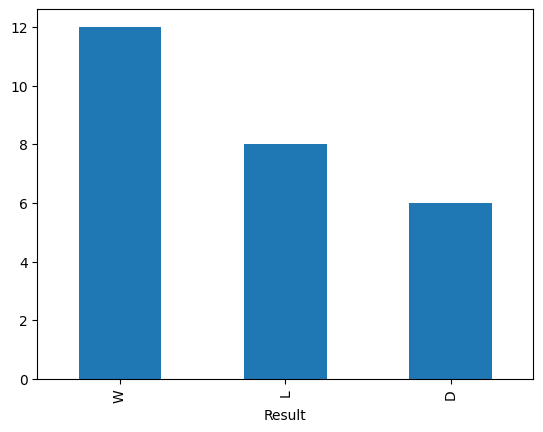

In [24]:
interteam.value_counts('Result').plot(kind='bar')

Here we see that Inter have won 12 of their 26 away matches and have a Win% of 46.15% when playing away from home

In [25]:
interteam1 = interteam.loc[interteam['Result'] == 'W']
interteam1

Comp Venue Result   GF   GA      xG_x       xGA  Poss  \
0               Serie A  Away      W  2.0  1.0  2.100000  0.700000  70.0   
7          Champions Lg  Away      W  2.0  0.0  1.900000  0.300000  71.0   
11              Serie A  Away      W  2.0  1.0  2.300000  1.200000  48.0   
14              Serie A  Away      W  4.0  3.0  2.400000  1.300000  42.0   
20              Serie A  Away      W  3.0  2.0  2.200000  1.800000  53.0   
25  Supercoppa Italiana  Away      W  3.0  0.0  1.704082  1.008163  35.0   
27              Serie A  Away      W  2.0  1.0  2.300000  1.000000  65.0   
41         Champions Lg  Away      W  2.0  0.0  1.400000  1.600000  43.0   
44              Serie A  Away      W  3.0  0.0  1.100000  0.900000  60.0   
47              Serie A  Away      W  6.0  0.0  2.400000  0.500000  74.0   
48              Serie A  Away      W  2.0  0.0  0.700000  0.900000  49.0   
49         Champions Lg  Away      W  2.0  0.0  2.000000  0.900000  42.0   

              Captain Formation  Gls  SoT%       Dist  
0    Samir Handanović     3-5-2    2  47.4  17.600000  
7    Marcelo Brozović     3-5-2    2  42.1  15.100000  
11  Danilo D'Ambrosio     3-5-2    2  25.0  15.900000  
14     Milan Škriniar     3-5-2    4  85.7  14.300000  
20     Milan Škriniar     3-5-2    2  21.4  15.800000  
25     Milan Škriniar     3-5-2    3  50.0  16.938776  
27   Lautaro Martínez     3-5-2    2  33.3  15.400000  
41   Marcelo Brozović     3-5-2    2  37.5  19.300000  
44   Samir Handanović     3-5-2    3  25.0  18.900000  
47   Samir Handanović     3-5-2    5  50.0  14.500000  
48   Marcelo Brozović     3-5-2    2  40.0  21.000000  
49   Lautaro Martínez     3-5-2    2  31.3  18.500000

Considering only the matches Inter have won away from home, I plotted a correlation graph to check which parameters most affects the outcome of their game (That is Win)

<ipython-input-26-6696d59da501>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(interteam.corr(), annot=True)


<Axes: >

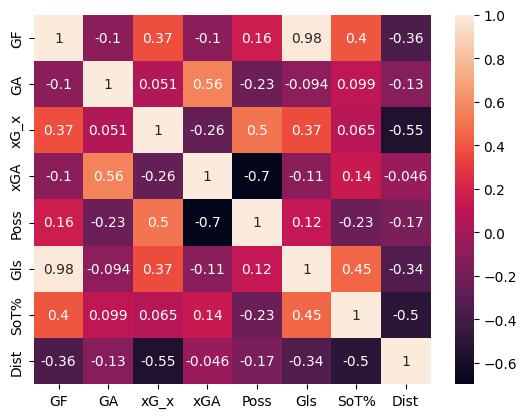

In [26]:
import seaborn as sns

sns.heatmap(interteam.corr(), annot=True)

We follow the same processes for Manchester City

In [27]:
city_url = 'https://fbref.com/en/squads/b8fd03ef/2022-2023/all_comps/Manchester-City-Stats-All-Competitions'
citydata = requests.get(city_url)

In [28]:
citydata.text

'    \n      \n<!DOCTYPE html>\n<html data-version="klecko-" data-root="/home/fb/deploy/www/base" lang="en" class="no-js" >\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />\n    <link rel="dns-prefetch" href="https://cdn.ssref.net/req/202305304" />\n<!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->\n<script type="text/javascript" async=true>\n    (function() {\n\tvar host = window.location.hostname;\n\tvar element = document.createElement(\'script\');\n\tvar firstScript = document.getElementsByTagName(\'script\')[0];\n\tvar url = \'https://cmp.quantcast.com\'\n\t    .concat(\'/choice/\', \'XwNYEpNeFfhfr\', \'/\', host, \n\t\t    \'/choice.js?tag_version=V2\');\n\tvar uspTries = 0;\n\tvar uspTriesLimit = 3;\n\telement.async = true;\n\telement.type = \'text/javascript\';\n\telement.src = url;\n\t\n\tfirstScript.parentNode.insertBef

In [29]:
citysoup = BeautifulSoup(citydata.text)

In [30]:
matches = pd.read_html(citydata.text, match = 'Scores & Fixtures')[0]

In [31]:
matches

Date   Time              Comp                Round  Day    Venue  \
0   2022-07-30  17:00  Community Shield  FA Community Shield  Sat  Neutral   
1   2022-08-07  16:30    Premier League          Matchweek 1  Sun     Away   
2   2022-08-13  15:00    Premier League          Matchweek 2  Sat     Home   
3   2022-08-21  16:30    Premier League          Matchweek 3  Sun     Away   
4   2022-08-27  15:00    Premier League          Matchweek 4  Sat     Home   
..         ...    ...               ...                  ...  ...      ...   
56  2023-05-21  16:00    Premier League         Matchweek 37  Sun     Home   
57  2023-05-24  20:00    Premier League         Matchweek 32  Wed     Away   
58  2023-05-28  16:30    Premier League         Matchweek 38  Sun     Away   
59  2023-06-03  15:00            FA Cup                Final  Sat     Home   
60  2023-06-10  22:00      Champions Lg                Final  Sat  Neutral   

   Result   GF   GA        Opponent   xG  xGA  Poss  Attendance  \
0       L  1.0  3.0       Liverpool  NaN  NaN  57.0         NaN   
1       W  2.0  0.0        West Ham  2.2  0.5  75.0     62443.0   
2       W  4.0  0.0     Bournemouth  1.7  0.1  67.0     53453.0   
3       D  3.0  3.0   Newcastle Utd  2.1  1.8  69.0     52258.0   
4       W  4.0  2.0  Crystal Palace  2.2  0.1  74.0     53112.0   
..    ...  ...  ...             ...  ...  ...   ...         ...   
56      W  1.0  0.0         Chelsea  1.2  1.2  64.0     53490.0   
57      D  1.0  1.0        Brighton  1.8  2.2  60.0     31388.0   
58      L  0.0  1.0       Brentford  1.6  1.3  65.0     17120.0   
59    NaN  NaN  NaN  Manchester Utd  NaN  NaN   NaN         NaN   
60    NaN  NaN  NaN        it Inter  NaN  NaN   NaN         NaN   

            Captain Formation         Referee  Match Report Notes  
0        Rúben Dias     4-3-3    Craig Pawson  Match Report   NaN  
1    İlkay Gündoğan     4-3-3  Michael Oliver  Match Report   NaN  
2    İlkay Gündoğan   4-2-3-1     David Coote  Match Report   NaN  
3    İlkay Gündoğan     4-3-3  Jarred Gillett  Match Report   NaN  
4   Kevin De Bruyne   4-2-3-1  Darren England  Match Report   NaN  
..              ...       ...             ...           ...   ...  
56      Kyle Walker    3-4-3◆  Michael Oliver  Match Report   NaN  
57   İlkay Gündoğan     4-3-3    Simon Hooper  Match Report   NaN  
58      Kyle Walker   3-2-4-1     John Brooks  Match Report   NaN  
59              NaN       NaN             NaN  Head-to-Head   NaN  
60              NaN       NaN             NaN  Head-to-Head   NaN  

[61 rows x 19 columns]

In [32]:
shootingcity_data = requests.get('https://fbref.com/en/squads/b8fd03ef/2022-2023/matchlogs/all_comps/shooting/Manchester-City-Match-Logs-All-Competitions')

In [33]:
shootingcity_data.text

'    \n      \n<!DOCTYPE html>\n<html data-version="klecko-" data-root="/home/fb/deploy/www/base" lang="en" class="no-js" >\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />\n    <link rel="dns-prefetch" href="https://cdn.ssref.net/req/202305304" />\n<!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->\n<script type="text/javascript" async=true>\n    (function() {\n\tvar host = window.location.hostname;\n\tvar element = document.createElement(\'script\');\n\tvar firstScript = document.getElementsByTagName(\'script\')[0];\n\tvar url = \'https://cmp.quantcast.com\'\n\t    .concat(\'/choice/\', \'XwNYEpNeFfhfr\', \'/\', host, \n\t\t    \'/choice.js?tag_version=V2\');\n\tvar uspTries = 0;\n\tvar uspTriesLimit = 3;\n\telement.async = true;\n\telement.type = \'text/javascript\';\n\telement.src = url;\n\t\n\tfirstScript.parentNode.insertBef

In [34]:
shooting_city = pd.read_html(shootingcity_data.text, match = 'Shooting')[0]

In [35]:
shooting_city

For Manchester City                                                     \
                  Date   Time              Comp                Round  Day   
0           2022-07-30  17:00  Community Shield  FA Community Shield  Sat   
1           2022-08-07  16:30    Premier League          Matchweek 1  Sun   
2           2022-08-13  15:00    Premier League          Matchweek 2  Sat   
3           2022-08-21  16:30    Premier League          Matchweek 3  Sun   
4           2022-08-27  15:00    Premier League          Matchweek 4  Sat   
5           2022-08-31  19:30    Premier League          Matchweek 5  Wed   
6           2022-09-03  17:30    Premier League          Matchweek 6  Sat   
7           2022-09-06  21:00      Champions Lg          Group stage  Tue   
8           2022-09-14  20:00      Champions Lg          Group stage  Wed   
9           2022-09-17  12:30    Premier League          Matchweek 8  Sat   
10          2022-10-02  14:00    Premier League          Matchweek 9  Sun   
11          2022-10-05  20:00      Champions Lg          Group stage  Wed   
12          2022-10-08  15:00    Premier League         Matchweek 10  Sat   
13          2022-10-11  18:45      Champions Lg          Group stage  Tue   
14          2022-10-16  16:30    Premier League         Matchweek 11  Sun   
15          2022-10-22  15:00    Premier League         Matchweek 13  Sat   
16          2022-10-25  21:00      Champions Lg          Group stage  Tue   
17          2022-10-29  12:30    Premier League         Matchweek 14  Sat   
18          2022-11-02  20:00      Champions Lg          Group stage  Wed   
19          2022-11-05  15:00    Premier League         Matchweek 15  Sat   
20          2022-11-09  20:00           EFL Cup          Third round  Wed   
21          2022-11-12  12:30    Premier League         Matchweek 16  Sat   
22          2022-12-22  20:00           EFL Cup         Fourth round  Thu   
23          2022-12-28  20:00    Premier League         Matchweek 17  Wed   
24          2022-12-31  15:00    Premier League         Matchweek 18  Sat   
25          2023-01-05  20:00    Premier League         Matchweek 19  Thu   
26          2023-01-08  16:30            FA Cup   Third round proper  Sun   
27          2023-01-11  20:00           EFL Cup       Quarter-finals  Wed   
28          2023-01-14  12:30    Premier League         Matchweek 20  Sat   
29          2023-01-19  20:00    Premier League          Matchweek 7  Thu   
30          2023-01-22  14:00    Premier League         Matchweek 21  Sun   
31          2023-01-27  20:00            FA Cup  Fourth round proper  Fri   
32          2023-02-05  16:30    Premier League         Matchweek 22  Sun   
33          2023-02-12  16:30    Premier League         Matchweek 23  Sun   
34          2023-02-15  19:30    Premier League         Matchweek 12  Wed   
35          2023-02-18  15:00    Premier League         Matchweek 24  Sat   
36          2023-02-22  21:00      Champions Lg          Round of 16  Wed   
37          2023-02-25  17:30    Premier League         Matchweek 25  Sat   
38          2023-02-28  20:00            FA Cup   Fifth round proper  Tue   
39          2023-03-04  12:30    Premier League         Matchweek 26  Sat   
40          2023-03-11  17:30    Premier League         Matchweek 27  Sat   
41          2023-03-14  20:00      Champions Lg          Round of 16  Tue   
42          2023-03-18  17:45            FA Cup       Quarter-finals  Sat   
43          2023-04-01  12:30    Premier League         Matchweek 29  Sat   
44          2023-04-08  17:30    Premier League         Matchweek 30  Sat   
45          2023-04-11  20:00      Champions Lg       Quarter-finals  Tue   
46          2023-04-15  17:30    Premier League         Matchweek 31  Sat   
47          2023-04-19  21:00      Champions Lg       Quarter-finals  Wed   
48          2023-04-22  16:45            FA Cup          Semi-finals  Sat   
49          2023-04-26  20:00    Premier League         Matchweek 33  Wed   

In [36]:
shooting_city.columns = shooting_city.columns.droplevel()
shooting_city

Date   Time              Comp                Round  Day    Venue  \
0   2022-07-30  17:00  Community Shield  FA Community Shield  Sat  Neutral   
1   2022-08-07  16:30    Premier League          Matchweek 1  Sun     Away   
2   2022-08-13  15:00    Premier League          Matchweek 2  Sat     Home   
3   2022-08-21  16:30    Premier League          Matchweek 3  Sun     Away   
4   2022-08-27  15:00    Premier League          Matchweek 4  Sat     Home   
5   2022-08-31  19:30    Premier League          Matchweek 5  Wed     Home   
6   2022-09-03  17:30    Premier League          Matchweek 6  Sat     Away   
7   2022-09-06  21:00      Champions Lg          Group stage  Tue     Away   
8   2022-09-14  20:00      Champions Lg          Group stage  Wed     Home   
9   2022-09-17  12:30    Premier League          Matchweek 8  Sat     Away   
10  2022-10-02  14:00    Premier League          Matchweek 9  Sun     Home   
11  2022-10-05  20:00      Champions Lg          Group stage  Wed     Home   
12  2022-10-08  15:00    Premier League         Matchweek 10  Sat     Home   
13  2022-10-11  18:45      Champions Lg          Group stage  Tue     Away   
14  2022-10-16  16:30    Premier League         Matchweek 11  Sun     Away   
15  2022-10-22  15:00    Premier League         Matchweek 13  Sat     Home   
16  2022-10-25  21:00      Champions Lg          Group stage  Tue     Away   
17  2022-10-29  12:30    Premier League         Matchweek 14  Sat     Away   
18  2022-11-02  20:00      Champions Lg          Group stage  Wed     Home   
19  2022-11-05  15:00    Premier League         Matchweek 15  Sat     Home   
20  2022-11-09  20:00           EFL Cup          Third round  Wed     Home   
21  2022-11-12  12:30    Premier League         Matchweek 16  Sat     Home   
22  2022-12-22  20:00           EFL Cup         Fourth round  Thu     Home   
23  2022-12-28  20:00    Premier League         Matchweek 17  Wed     Away   
24  2022-12-31  15:00    Premier League         Matchweek 18  Sat     Home   
25  2023-01-05  20:00    Premier League         Matchweek 19  Thu     Away   
26  2023-01-08  16:30            FA Cup   Third round proper  Sun     Home   
27  2023-01-11  20:00           EFL Cup       Quarter-finals  Wed     Away   
28  2023-01-14  12:30    Premier League         Matchweek 20  Sat     Away   
29  2023-01-19  20:00    Premier League          Matchweek 7  Thu     Home   
30  2023-01-22  14:00    Premier League         Matchweek 21  Sun     Home   
31  2023-01-27  20:00            FA Cup  Fourth round proper  Fri     Home   
32  2023-02-05  16:30    Premier League         Matchweek 22  Sun     Away   
33  2023-02-12  16:30    Premier League         Matchweek 23  Sun     Home   
34  2023-02-15  19:30    Premier League         Matchweek 12  Wed     Away   
35  2023-02-18  15:00    Premier League         Matchweek 24  Sat     Away   
36  2023-02-22  21:00      Champions Lg          Round of 16  Wed     Away   
37  2023-02-25  17:30    Premier League         Matchweek 25  Sat     Away   
38  2023-02-28  20:00            FA Cup   Fifth round proper  Tue     Away   
39  2023-03-04  12:30    Premier League         Matchweek 26  Sat     Home   
40  2023-03-11  17:30    Premier League         Matchweek 27  Sat     Away   
41  2023-03-14  20:00      Champions Lg          Round of 16  Tue     Home   
42  2023-03-18  17:45            FA Cup       Quarter-finals  Sat     Home   
43  2023-04-01  12:30    Premier League         Matchweek 29  Sat     Home   
44  2023-04-08  17:30    Premier League         Matchweek 30  Sat     Away   
45  2023-04-11  20:00      Champions Lg       Quarter-finals  Tue     Home   
46  2023-04-15  17:30    Premier League         Matchweek 31  Sat     Home   
47  2023-04-19  21:00      Champions Lg       Quarter-finals  Wed     Away   
48  2023-04-22  16:45            FA Cup          Semi-finals  Sat  Neutral   
49  2023-04-26  20:00    Premier League         Matchweek 33  Wed     Home   
50  2023-04-30  14:00    Premier

In [37]:
cityteam = matches.merge(shooting_city[['Date','Gls','SoT%','Dist','xG']], on = 'Date')
cityteam

Date   Time              Comp                Round  Day    Venue  \
0   2022-07-30  17:00  Community Shield  FA Community Shield  Sat  Neutral   
1   2022-08-07  16:30    Premier League          Matchweek 1  Sun     Away   
2   2022-08-13  15:00    Premier League          Matchweek 2  Sat     Home   
3   2022-08-21  16:30    Premier League          Matchweek 3  Sun     Away   
4   2022-08-27  15:00    Premier League          Matchweek 4  Sat     Home   
5   2022-08-31  19:30    Premier League          Matchweek 5  Wed     Home   
6   2022-09-03  17:30    Premier League          Matchweek 6  Sat     Away   
7   2022-09-06  21:00      Champions Lg          Group stage  Tue     Away   
8   2022-09-14  20:00      Champions Lg          Group stage  Wed     Home   
9   2022-09-17  12:30    Premier League          Matchweek 8  Sat     Away   
10  2022-10-02  14:00    Premier League          Matchweek 9  Sun     Home   
11  2022-10-05  20:00      Champions Lg          Group stage  Wed     Home   
12  2022-10-08  15:00    Premier League         Matchweek 10  Sat     Home   
13  2022-10-11  18:45      Champions Lg          Group stage  Tue     Away   
14  2022-10-16  16:30    Premier League         Matchweek 11  Sun     Away   
15  2022-10-22  15:00    Premier League         Matchweek 13  Sat     Home   
16  2022-10-25  21:00      Champions Lg          Group stage  Tue     Away   
17  2022-10-29  12:30    Premier League         Matchweek 14  Sat     Away   
18  2022-11-02  20:00      Champions Lg          Group stage  Wed     Home   
19  2022-11-05  15:00    Premier League         Matchweek 15  Sat     Home   
20  2022-11-09  20:00           EFL Cup          Third round  Wed     Home   
21  2022-11-12  12:30    Premier League         Matchweek 16  Sat     Home   
22  2022-12-22  20:00           EFL Cup         Fourth round  Thu     Home   
23  2022-12-28  20:00    Premier League         Matchweek 17  Wed     Away   
24  2022-12-31  15:00    Premier League         Matchweek 18  Sat     Home   
25  2023-01-05  20:00    Premier League         Matchweek 19  Thu     Away   
26  2023-01-08  16:30            FA Cup   Third round proper  Sun     Home   
27  2023-01-11  20:00           EFL Cup       Quarter-finals  Wed     Away   
28  2023-01-14  12:30    Premier League         Matchweek 20  Sat     Away   
29  2023-01-19  20:00    Premier League          Matchweek 7  Thu     Home   
30  2023-01-22  14:00    Premier League         Matchweek 21  Sun     Home   
31  2023-01-27  20:00            FA Cup  Fourth round proper  Fri     Home   
32  2023-02-05  16:30    Premier League         Matchweek 22  Sun     Away   
33  2023-02-12  16:30    Premier League         Matchweek 23  Sun     Home   
34  2023-02-15  19:30    Premier League         Matchweek 12  Wed     Away   
35  2023-02-18  15:00    Premier League         Matchweek 24  Sat     Away   
36  2023-02-22  21:00      Champions Lg          Round of 16  Wed     Away   
37  2023-02-25  17:30    Premier League         Matchweek 25  Sat     Away   
38  2023-02-28  20:00            FA Cup   Fifth round proper  Tue     Away   
39  2023-03-04  12:30    Premier League         Matchweek 26  Sat     Home   
40  2023-03-11  17:30    Premier League         Matchweek 27  Sat     Away   
41  2023-03-14  20:00      Champions Lg          Round of 16  Tue     Home   
42  2023-03-18  17:45            FA Cup       Quarter-finals  Sat     Home   
43  2023-04-01  12:30    Premier League         Matchweek 29  Sat     Home   
44  2023-04-08  17:30    Premier League         Matchweek 30  Sat     Away   
45  2023-04-11  20:00      Champions Lg       Quarter-finals  Tue     Home   
46  2023-04-15  17:30    Premier League         Matchweek 31  Sat     Home   
47  2023-04-19  21:00      Champions Lg       Quarter-finals  Wed     Away   
48  2023-04-22  16:45            FA Cup          Semi-finals  Sat  Neutral   
49  2023-04-26  20:00    Premier League         Matchweek 33  Wed     Home   
50  2023-04-30  14:00    Premier

In [38]:
cityteam = cityteam.drop(['Date', 'Time','Round','Day','Opponent','Attendance','Referee','Match Report','Notes','xG_y'], axis=1)

In [39]:
cityteam

Comp    Venue Result   GF   GA  xG_x  xGA  Poss  \
0   Community Shield  Neutral      L  1.0  3.0   NaN  NaN  57.0   
1     Premier League     Away      W  2.0  0.0   2.2  0.5  75.0   
2     Premier League     Home      W  4.0  0.0   1.7  0.1  67.0   
3     Premier League     Away      D  3.0  3.0   2.1  1.8  69.0   
4     Premier League     Home      W  4.0  2.0   2.2  0.1  74.0   
5     Premier League     Home      W  6.0  0.0   3.3  0.7  74.0   
6     Premier League     Away      D  1.0  1.0   2.1  0.3  71.0   
7       Champions Lg     Away      W  4.0  0.0   3.6  0.3  61.0   
8       Champions Lg     Home      W  2.0  1.0   1.0  0.7  66.0   
9     Premier League     Away      W  3.0  0.0   1.1  0.4  59.0   
10    Premier League     Home      W  6.0  3.0   3.2  1.7  53.0   
11      Champions Lg     Home      W  5.0  0.0   4.3  0.4  75.0   
12    Premier League     Home      W  4.0  0.0   2.4  0.2  65.0   
13      Champions Lg     Away      D  0.0  0.0   1.6  0.3  59.0   
14    Premier League     Away      L  0.0  1.0   1.0  2.1  63.0   
15    Premier League     Home      W  3.0  1.0   1.6  0.5  48.0   
16      Champions Lg     Away      D  0.0  0.0   1.2  1.2  73.0   
17    Premier League     Away      W  1.0  0.0   1.0  0.7  64.0   
18      Champions Lg     Home      W  3.0  1.0   2.0  0.4  61.0   
19    Premier League     Home      W  2.0  1.0   2.1  1.0  70.0   
20           EFL Cup     Home      W  2.0  0.0   NaN  NaN  55.0   
21    Premier League     Home      L  1.0  2.0   1.6  1.3  74.0   
22           EFL Cup     Home      W  3.0  2.0   NaN  NaN  57.0   
23    Premier League     Away      W  3.0  1.0   4.3  0.6  69.0   
24    Premier League     Home      D  1.0  1.0   1.7  0.1  74.0   
25    Premier League     Away      W  1.0  0.0   2.1  0.4  52.0   
26            FA Cup     Home      W  4.0  0.0   NaN  NaN  58.0   
27           EFL Cup     Away      L  0.0  2.0   NaN  NaN  72.0   
28    Premier League     Away      L  1.0  2.0   0.6  1.7  70.0   
29    Premier League     Home      W  4.0  2.0   2.3  0.8  58.0   
30    Premier League     Home      W  3.0  0.0   2.8  0.8  55.0   
31            FA Cup     Home      W  1.0  0.0   NaN  NaN  54.0   
32    Premier League     Away      L  0.0  1.0   1.3  1.4  64.0   
33    Premier League     Home      W  3.0  1.0   3.3  0.3  67.0   
34    Premier League     Away      W  3.0  1.0   1.8  1.6  37.0   
35    Premier League     Away      D  1.0  1.0   2.4  0.9  73.0   
36      Champions Lg     Away      D  1.0  1.0   1.2  0.8  62.0   
37    Premier League     Away      W  4.0  1.0   2.4  1.0  66.0   
38            FA Cup     Away      W  3.0  0.0   NaN  NaN  70.0   
39    Premier League     Home      W  2.0  0.0   1.3  0.4  56.0   
40    Premier League     Away      W  1.0  0.0   2.1  0.2  67.0   
41      Champions Lg     Home      W  7.0  0.0   4.2  0.6  66.0   
42            FA Cup     Home      W  6.0  0.0   NaN  NaN  58.0   
43    Premier League     Home      W  4.0  1.0   2.9  0.3  68.0   
44    Premier League     Away      W  4.0  1.0   2.9  0.4  73.0   
45      Champions Lg     Home      W  3.0  0.0   1.8  0.9  44.0   
46    Premier League     Home      W  3.0  1.0   1.6  2.3  70.0   
47      Champions Lg     Away      D  1.0  1.0   1.3  2.2  42.0   
48            FA Cup  Neutral      W  3.0  0.0   NaN  NaN  79.0   
49    Premier League     Home      W  4.0  1.0   2.5  0.5  52.0   
50    Premier League     Away      W  2.0  1.0   2.5  0.2  62.0   
51    Premier League     Home      W  3.0  0.0   2.3  0.4  69.0   
52    Premier League     Home      W  2.0  1.0   2.6  0.2  80.0   
53      Champions Lg     Away      D  1.0  1.0   0.5  0.7  55.0   
54    Premier League     Away      W  3.0  0.0   0.8  1.6  63.0   
55      Champions Lg     Home      W  4.0  0.0   2.8  0.5  59.0   
56    Premier League     Home      W  1.0  0.0   1.2  1.2  64.0   
57    Premier League     Away      D  1.0  1.0   1.8  2.2  60.0   
58    Premier League     Away      L  0.0  1.0   1.6  1.3  65.0

In [40]:
cityteam.isnull().sum()

Comp         0
Venue        0
Result       0
GF           0
GA           0
xG_x         9
xGA          9
Poss         0
Captain      0
Formation    0
Gls          0
SoT%         0
Dist         9
dtype: int64

In [41]:
cityteam.describe()

GF         GA       xG_x        xGA       Poss        Gls  \
count  59.000000  59.000000  50.000000  50.000000  59.000000  59.000000   
mean    2.508475   0.762712   2.084000   0.824000  63.440678   2.457627   
std     1.685362   0.837463   0.914143   0.618939   9.046377   1.643399   
min     0.000000   0.000000   0.500000   0.100000  37.000000   0.000000   
25%     1.000000   0.000000   1.375000   0.400000  58.000000   1.000000   
50%     3.000000   1.000000   2.100000   0.650000  64.000000   3.000000   
75%     4.000000   1.000000   2.500000   1.200000  70.000000   3.000000   
max     7.000000   3.000000   4.300000   2.300000  80.000000   7.000000   

            SoT%       Dist  
count  59.000000  50.000000  
mean   37.479661  16.844000  
std    15.548487   2.378317  
min     0.000000  12.100000  
25%    27.000000  15.075000  
50%    36.800000  16.300000  
75%    48.800000  18.700000  
max    77.800000  21.700000

In [42]:
cityteam["xG_x"].fillna(cityteam["xG_x"].mean(), inplace = True)
cityteam

Comp    Venue Result   GF   GA   xG_x  xGA  Poss  \
0   Community Shield  Neutral      L  1.0  3.0  2.084  NaN  57.0   
1     Premier League     Away      W  2.0  0.0  2.200  0.5  75.0   
2     Premier League     Home      W  4.0  0.0  1.700  0.1  67.0   
3     Premier League     Away      D  3.0  3.0  2.100  1.8  69.0   
4     Premier League     Home      W  4.0  2.0  2.200  0.1  74.0   
5     Premier League     Home      W  6.0  0.0  3.300  0.7  74.0   
6     Premier League     Away      D  1.0  1.0  2.100  0.3  71.0   
7       Champions Lg     Away      W  4.0  0.0  3.600  0.3  61.0   
8       Champions Lg     Home      W  2.0  1.0  1.000  0.7  66.0   
9     Premier League     Away      W  3.0  0.0  1.100  0.4  59.0   
10    Premier League     Home      W  6.0  3.0  3.200  1.7  53.0   
11      Champions Lg     Home      W  5.0  0.0  4.300  0.4  75.0   
12    Premier League     Home      W  4.0  0.0  2.400  0.2  65.0   
13      Champions Lg     Away      D  0.0  0.0  1.600  0.3  59.0   
14    Premier League     Away      L  0.0  1.0  1.000  2.1  63.0   
15    Premier League     Home      W  3.0  1.0  1.600  0.5  48.0   
16      Champions Lg     Away      D  0.0  0.0  1.200  1.2  73.0   
17    Premier League     Away      W  1.0  0.0  1.000  0.7  64.0   
18      Champions Lg     Home      W  3.0  1.0  2.000  0.4  61.0   
19    Premier League     Home      W  2.0  1.0  2.100  1.0  70.0   
20           EFL Cup     Home      W  2.0  0.0  2.084  NaN  55.0   
21    Premier League     Home      L  1.0  2.0  1.600  1.3  74.0   
22           EFL Cup     Home      W  3.0  2.0  2.084  NaN  57.0   
23    Premier League     Away      W  3.0  1.0  4.300  0.6  69.0   
24    Premier League     Home      D  1.0  1.0  1.700  0.1  74.0   
25    Premier League     Away      W  1.0  0.0  2.100  0.4  52.0   
26            FA Cup     Home      W  4.0  0.0  2.084  NaN  58.0   
27           EFL Cup     Away      L  0.0  2.0  2.084  NaN  72.0   
28    Premier League     Away      L  1.0  2.0  0.600  1.7  70.0   
29    Premier League     Home      W  4.0  2.0  2.300  0.8  58.0   
30    Premier League     Home      W  3.0  0.0  2.800  0.8  55.0   
31            FA Cup     Home      W  1.0  0.0  2.084  NaN  54.0   
32    Premier League     Away      L  0.0  1.0  1.300  1.4  64.0   
33    Premier League     Home      W  3.0  1.0  3.300  0.3  67.0   
34    Premier League     Away      W  3.0  1.0  1.800  1.6  37.0   
35    Premier League     Away      D  1.0  1.0  2.400  0.9  73.0   
36      Champions Lg     Away      D  1.0  1.0  1.200  0.8  62.0   
37    Premier League     Away      W  4.0  1.0  2.400  1.0  66.0   
38            FA Cup     Away      W  3.0  0.0  2.084  NaN  70.0   
39    Premier League     Home      W  2.0  0.0  1.300  0.4  56.0   
40    Premier League     Away      W  1.0  0.0  2.100  0.2  67.0   
41      Champions Lg     Home      W  7.0  0.0  4.200  0.6  66.0   
42            FA Cup     Home      W  6.0  0.0  2.084  NaN  58.0   
43    Premier League     Home      W  4.0  1.0  2.900  0.3  68.0   
44    Premier League     Away      W  4.0  1.0  2.900  0.4  73.0   
45      Champions Lg     Home      W  3.0  0.0  1.800  0.9  44.0   
46    Premier League     Home      W  3.0  1.0  1.600  2.3  70.0   
47      Champions Lg     Away      D  1.0  1.0  1.300  2.2  42.0   
48            FA Cup  Neutral      W  3.0  0.0  2.084  NaN  79.0   
49    Premier League     Home      W  4.0  1.0  2.500  0.5  52.0   
50    Premier League     Away      W  2.0  1.0  2.500  0.2  62.0   
51    Premier League     Home      W  3.0  0.0  2.300  0.4  69.0   
52    Premier League     Home      W  2.0  1.0  2.600  0.2  80.0   
53      Champions Lg     Away      D  1.0  1.0  0.500  0.7  55.0   
54    Premier League     Away      W  3.0  0.0  0.800  1.6  63.0   
55      Champions Lg     Home      W  4.0  0.0  2.800  0.5  59.0   
56    Premier League     Home      W  1.0  0.0  1.200  1.2  64.0   
57    Premier League     Away      D  1.0  1.0  1.800  2.2  60.0   
58  

In [43]:
cityteam["xGA"].fillna(cityteam["xGA"].mean(), inplace = True)
cityteam

Comp    Venue Result   GF   GA   xG_x    xGA  Poss  \
0   Community Shield  Neutral      L  1.0  3.0  2.084  0.824  57.0   
1     Premier League     Away      W  2.0  0.0  2.200  0.500  75.0   
2     Premier League     Home      W  4.0  0.0  1.700  0.100  67.0   
3     Premier League     Away      D  3.0  3.0  2.100  1.800  69.0   
4     Premier League     Home      W  4.0  2.0  2.200  0.100  74.0   
5     Premier League     Home      W  6.0  0.0  3.300  0.700  74.0   
6     Premier League     Away      D  1.0  1.0  2.100  0.300  71.0   
7       Champions Lg     Away      W  4.0  0.0  3.600  0.300  61.0   
8       Champions Lg     Home      W  2.0  1.0  1.000  0.700  66.0   
9     Premier League     Away      W  3.0  0.0  1.100  0.400  59.0   
10    Premier League     Home      W  6.0  3.0  3.200  1.700  53.0   
11      Champions Lg     Home      W  5.0  0.0  4.300  0.400  75.0   
12    Premier League     Home      W  4.0  0.0  2.400  0.200  65.0   
13      Champions Lg     Away      D  0.0  0.0  1.600  0.300  59.0   
14    Premier League     Away      L  0.0  1.0  1.000  2.100  63.0   
15    Premier League     Home      W  3.0  1.0  1.600  0.500  48.0   
16      Champions Lg     Away      D  0.0  0.0  1.200  1.200  73.0   
17    Premier League     Away      W  1.0  0.0  1.000  0.700  64.0   
18      Champions Lg     Home      W  3.0  1.0  2.000  0.400  61.0   
19    Premier League     Home      W  2.0  1.0  2.100  1.000  70.0   
20           EFL Cup     Home      W  2.0  0.0  2.084  0.824  55.0   
21    Premier League     Home      L  1.0  2.0  1.600  1.300  74.0   
22           EFL Cup     Home      W  3.0  2.0  2.084  0.824  57.0   
23    Premier League     Away      W  3.0  1.0  4.300  0.600  69.0   
24    Premier League     Home      D  1.0  1.0  1.700  0.100  74.0   
25    Premier League     Away      W  1.0  0.0  2.100  0.400  52.0   
26            FA Cup     Home      W  4.0  0.0  2.084  0.824  58.0   
27           EFL Cup     Away      L  0.0  2.0  2.084  0.824  72.0   
28    Premier League     Away      L  1.0  2.0  0.600  1.700  70.0   
29    Premier League     Home      W  4.0  2.0  2.300  0.800  58.0   
30    Premier League     Home      W  3.0  0.0  2.800  0.800  55.0   
31            FA Cup     Home      W  1.0  0.0  2.084  0.824  54.0   
32    Premier League     Away      L  0.0  1.0  1.300  1.400  64.0   
33    Premier League     Home      W  3.0  1.0  3.300  0.300  67.0   
34    Premier League     Away      W  3.0  1.0  1.800  1.600  37.0   
35    Premier League     Away      D  1.0  1.0  2.400  0.900  73.0   
36      Champions Lg     Away      D  1.0  1.0  1.200  0.800  62.0   
37    Premier League     Away      W  4.0  1.0  2.400  1.000  66.0   
38            FA Cup     Away      W  3.0  0.0  2.084  0.824  70.0   
39    Premier League     Home      W  2.0  0.0  1.300  0.400  56.0   
40    Premier League     Away      W  1.0  0.0  2.100  0.200  67.0   
41      Champions Lg     Home      W  7.0  0.0  4.200  0.600  66.0   
42            FA Cup     Home      W  6.0  0.0  2.084  0.824  58.0   
43    Premier League     Home      W  4.0  1.0  2.900  0.300  68.0   
44    Premier League     Away      W  4.0  1.0  2.900  0.400  73.0   
45      Champions Lg     Home      W  3.0  0.0  1.800  0.900  44.0   
46    Premier League     Home      W  3.0  1.0  1.600  2.300  70.0   
47      Champions Lg     Away      D  1.0  1.0  1.300  2.200  42.0   
48            FA Cup  Neutral      W  3.0  0.0  2.084  0.824  79.0   
49    Premier League     Home      W  4.0  1.0  2.500  0.500  52.0   
50    Premier League     Away      W  2.0  1.0  2.500  0.200  62.0   
51    Premier League     Home      W  3.0  0.0  2.300  0.400  69.0   
52    Premier League     Home      W  2.0  1.0  2.600  0.200  80.0   
53      Champions Lg     Away      D  1.0  1.0  0.500  0.700  55.0   
54    Premier League     Away      W  3.0  0.0  0.800  1.600  63.0   
55      Champions Lg     Home      W  4.0  0.0  2.800  0.500  59.0   
56    Premier League     H

In [44]:
cityteam["Dist"].fillna(cityteam["Dist"].mean(), inplace = True)
cityteam

Comp    Venue Result   GF   GA   xG_x    xGA  Poss  \
0   Community Shield  Neutral      L  1.0  3.0  2.084  0.824  57.0   
1     Premier League     Away      W  2.0  0.0  2.200  0.500  75.0   
2     Premier League     Home      W  4.0  0.0  1.700  0.100  67.0   
3     Premier League     Away      D  3.0  3.0  2.100  1.800  69.0   
4     Premier League     Home      W  4.0  2.0  2.200  0.100  74.0   
5     Premier League     Home      W  6.0  0.0  3.300  0.700  74.0   
6     Premier League     Away      D  1.0  1.0  2.100  0.300  71.0   
7       Champions Lg     Away      W  4.0  0.0  3.600  0.300  61.0   
8       Champions Lg     Home      W  2.0  1.0  1.000  0.700  66.0   
9     Premier League     Away      W  3.0  0.0  1.100  0.400  59.0   
10    Premier League     Home      W  6.0  3.0  3.200  1.700  53.0   
11      Champions Lg     Home      W  5.0  0.0  4.300  0.400  75.0   
12    Premier League     Home      W  4.0  0.0  2.400  0.200  65.0   
13      Champions Lg     Away      D  0.0  0.0  1.600  0.300  59.0   
14    Premier League     Away      L  0.0  1.0  1.000  2.100  63.0   
15    Premier League     Home      W  3.0  1.0  1.600  0.500  48.0   
16      Champions Lg     Away      D  0.0  0.0  1.200  1.200  73.0   
17    Premier League     Away      W  1.0  0.0  1.000  0.700  64.0   
18      Champions Lg     Home      W  3.0  1.0  2.000  0.400  61.0   
19    Premier League     Home      W  2.0  1.0  2.100  1.000  70.0   
20           EFL Cup     Home      W  2.0  0.0  2.084  0.824  55.0   
21    Premier League     Home      L  1.0  2.0  1.600  1.300  74.0   
22           EFL Cup     Home      W  3.0  2.0  2.084  0.824  57.0   
23    Premier League     Away      W  3.0  1.0  4.300  0.600  69.0   
24    Premier League     Home      D  1.0  1.0  1.700  0.100  74.0   
25    Premier League     Away      W  1.0  0.0  2.100  0.400  52.0   
26            FA Cup     Home      W  4.0  0.0  2.084  0.824  58.0   
27           EFL Cup     Away      L  0.0  2.0  2.084  0.824  72.0   
28    Premier League     Away      L  1.0  2.0  0.600  1.700  70.0   
29    Premier League     Home      W  4.0  2.0  2.300  0.800  58.0   
30    Premier League     Home      W  3.0  0.0  2.800  0.800  55.0   
31            FA Cup     Home      W  1.0  0.0  2.084  0.824  54.0   
32    Premier League     Away      L  0.0  1.0  1.300  1.400  64.0   
33    Premier League     Home      W  3.0  1.0  3.300  0.300  67.0   
34    Premier League     Away      W  3.0  1.0  1.800  1.600  37.0   
35    Premier League     Away      D  1.0  1.0  2.400  0.900  73.0   
36      Champions Lg     Away      D  1.0  1.0  1.200  0.800  62.0   
37    Premier League     Away      W  4.0  1.0  2.400  1.000  66.0   
38            FA Cup     Away      W  3.0  0.0  2.084  0.824  70.0   
39    Premier League     Home      W  2.0  0.0  1.300  0.400  56.0   
40    Premier League     Away      W  1.0  0.0  2.100  0.200  67.0   
41      Champions Lg     Home      W  7.0  0.0  4.200  0.600  66.0   
42            FA Cup     Home      W  6.0  0.0  2.084  0.824  58.0   
43    Premier League     Home      W  4.0  1.0  2.900  0.300  68.0   
44    Premier League     Away      W  4.0  1.0  2.900  0.400  73.0   
45      Champions Lg     Home      W  3.0  0.0  1.800  0.900  44.0   
46    Premier League     Home      W  3.0  1.0  1.600  2.300  70.0   
47      Champions Lg     Away      D  1.0  1.0  1.300  2.200  42.0   
48            FA Cup  Neutral      W  3.0  0.0  2.084  0.824  79.0   
49    Premier League     Home      W  4.0  1.0  2.500  0.500  52.0   
50    Premier League     Away      W  2.0  1.0  2.500  0.200  62.0   
51    Premier League     Home      W  3.0  0.0  2.300  0.400  69.0   
52    Premier League     Home      W  2.0  1.0  2.600  0.200  80.0   
53      Champions Lg     Away      D  1.0  1.0  0.500  0.700  55.0   
54    Premier League     Away      W  3.0  0.0  0.800  1.600  63.0   
55      Champions Lg     Home      W  4.0  0.0  2.800  0.500  59.0   
56    Premier League     H

In [45]:
cityteam = cityteam.loc[cityteam['Venue'] == 'Away']
cityteam

Comp Venue Result   GF   GA   xG_x    xGA  Poss  \
1   Premier League  Away      W  2.0  0.0  2.200  0.500  75.0   
3   Premier League  Away      D  3.0  3.0  2.100  1.800  69.0   
6   Premier League  Away      D  1.0  1.0  2.100  0.300  71.0   
7     Champions Lg  Away      W  4.0  0.0  3.600  0.300  61.0   
9   Premier League  Away      W  3.0  0.0  1.100  0.400  59.0   
13    Champions Lg  Away      D  0.0  0.0  1.600  0.300  59.0   
14  Premier League  Away      L  0.0  1.0  1.000  2.100  63.0   
16    Champions Lg  Away      D  0.0  0.0  1.200  1.200  73.0   
17  Premier League  Away      W  1.0  0.0  1.000  0.700  64.0   
23  Premier League  Away      W  3.0  1.0  4.300  0.600  69.0   
25  Premier League  Away      W  1.0  0.0  2.100  0.400  52.0   
27         EFL Cup  Away      L  0.0  2.0  2.084  0.824  72.0   
28  Premier League  Away      L  1.0  2.0  0.600  1.700  70.0   
32  Premier League  Away      L  0.0  1.0  1.300  1.400  64.0   
34  Premier League  Away      W  3.0  1.0  1.800  1.600  37.0   
35  Premier League  Away      D  1.0  1.0  2.400  0.900  73.0   
36    Champions Lg  Away      D  1.0  1.0  1.200  0.800  62.0   
37  Premier League  Away      W  4.0  1.0  2.400  1.000  66.0   
38          FA Cup  Away      W  3.0  0.0  2.084  0.824  70.0   
40  Premier League  Away      W  1.0  0.0  2.100  0.200  67.0   
44  Premier League  Away      W  4.0  1.0  2.900  0.400  73.0   
47    Champions Lg  Away      D  1.0  1.0  1.300  2.200  42.0   
50  Premier League  Away      W  2.0  1.0  2.500  0.200  62.0   
53    Champions Lg  Away      D  1.0  1.0  0.500  0.700  55.0   
54  Premier League  Away      W  3.0  0.0  0.800  1.600  63.0   
57  Premier League  Away      D  1.0  1.0  1.800  2.200  60.0   
58  Premier League  Away      L  0.0  1.0  1.600  1.300  65.0   

            Captain Formation  Gls  SoT%    Dist  
1    İlkay Gündoğan     4-3-3    2   7.7  18.700  
3    İlkay Gündoğan     4-3-3    3  47.6  16.200  
6    İlkay Gündoğan     4-3-3    1  30.8  16.800  
7   Kevin De Bruyne     4-3-3    4  37.5  16.900  
9   Kevin De Bruyne     4-3-3    3  43.8  19.400  
13   İlkay Gündoğan   4-2-3-1    0  23.1  21.700  
14   İlkay Gündoğan     3-4-3    0  37.5  18.400  
16   İlkay Gündoğan     4-4-2    0  28.6  19.800  
17   İlkay Gündoğan     4-3-3    1  33.3  20.800  
23   İlkay Gündoğan     4-3-3    3  34.6  16.000  
25   İlkay Gündoğan   3-2-4-1    1  25.0  16.000  
27   İlkay Gündoğan     4-3-3    0   0.0  16.844  
28  Kevin De Bruyne     4-3-3    1  20.0  19.200  
32      Kyle Walker     4-4-2    0  33.3  17.700  
34   İlkay Gündoğan   4-1-4-1    3  55.6  12.100  
35   İlkay Gündoğan   3-2-4-1    1  26.1  18.000  
36   İlkay Gündoğan   3-2-4-1    1  25.0  15.900  
37   İlkay Gündoğan   3-2-4-1    3  25.0  15.300  
38  Kevin De Bruyne   3-2-4-1    3  37.5  16.844  
40   İlkay Gündoğan   4-2-3-1    1  23.1  19.000  
44   İlkay Gündoğan   3-2-4-1    4  58.3  13.200  
47   İlkay Gündoğan   3-2-4-1    1  33.3  21.000  
50   İlkay Gündoğan   3-2-4-1    2  72.7  14.100  
53   İlkay Gündoğan   3-2-4-1    1  60.0  21.700  
54   İlkay Gündoğan   4-2-3-1    3  44.4  19.300  
57   İlkay Gündoğan     4-3-3    1  30.8  13.900  
58      Kyle Walker   3-2-4-1    0  11.8  16.800

<Axes: xlabel='Result'>

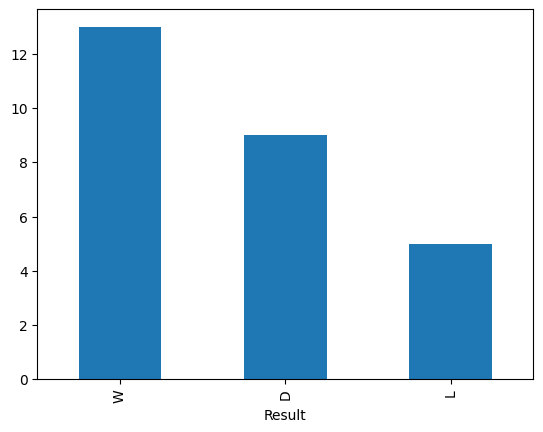

In [46]:
cityteam.value_counts('Result').plot(kind='bar')

Here we see that Inter have won 13 of their 27 away matches and have a Win% of 48.14% when playing away from home

In [47]:
cityteam1 = cityteam.loc[cityteam['Result'] == 'W']
cityteam1

Comp Venue Result   GF   GA   xG_x    xGA  Poss  \
1   Premier League  Away      W  2.0  0.0  2.200  0.500  75.0   
7     Champions Lg  Away      W  4.0  0.0  3.600  0.300  61.0   
9   Premier League  Away      W  3.0  0.0  1.100  0.400  59.0   
17  Premier League  Away      W  1.0  0.0  1.000  0.700  64.0   
23  Premier League  Away      W  3.0  1.0  4.300  0.600  69.0   
25  Premier League  Away      W  1.0  0.0  2.100  0.400  52.0   
34  Premier League  Away      W  3.0  1.0  1.800  1.600  37.0   
37  Premier League  Away      W  4.0  1.0  2.400  1.000  66.0   
38          FA Cup  Away      W  3.0  0.0  2.084  0.824  70.0   
40  Premier League  Away      W  1.0  0.0  2.100  0.200  67.0   
44  Premier League  Away      W  4.0  1.0  2.900  0.400  73.0   
50  Premier League  Away      W  2.0  1.0  2.500  0.200  62.0   
54  Premier League  Away      W  3.0  0.0  0.800  1.600  63.0   

            Captain Formation  Gls  SoT%    Dist  
1    İlkay Gündoğan     4-3-3    2   7.7  18.700  
7   Kevin De Bruyne     4-3-3    4  37.5  16.900  
9   Kevin De Bruyne     4-3-3    3  43.8  19.400  
17   İlkay Gündoğan     4-3-3    1  33.3  20.800  
23   İlkay Gündoğan     4-3-3    3  34.6  16.000  
25   İlkay Gündoğan   3-2-4-1    1  25.0  16.000  
34   İlkay Gündoğan   4-1-4-1    3  55.6  12.100  
37   İlkay Gündoğan   3-2-4-1    3  25.0  15.300  
38  Kevin De Bruyne   3-2-4-1    3  37.5  16.844  
40   İlkay Gündoğan   4-2-3-1    1  23.1  19.000  
44   İlkay Gündoğan   3-2-4-1    4  58.3  13.200  
50   İlkay Gündoğan   3-2-4-1    2  72.7  14.100  
54   İlkay Gündoğan   4-2-3-1    3  44.4  19.300

In [48]:
cityteam.describe()

GF         GA       xG_x        xGA       Poss        Gls  \
count  27.00000  27.000000  27.000000  27.000000  27.000000  27.000000   
mean    1.62963   0.777778   1.839556   0.979556  63.555556   1.592593   
std     1.36292   0.751068   0.871539   0.643030   9.052553   1.308530   
min     0.00000   0.000000   0.500000   0.200000  37.000000   0.000000   
25%     1.00000   0.000000   1.200000   0.400000  60.500000   1.000000   
50%     1.00000   1.000000   1.800000   0.824000  64.000000   1.000000   
75%     3.00000   1.000000   2.150000   1.500000  70.000000   3.000000   
max     4.00000   3.000000   4.300000   2.200000  75.000000   4.000000   

            SoT%       Dist  
count  27.000000  27.000000  
mean   33.570370  17.466222  
std    16.151561   2.528072  
min     0.000000  12.100000  
25%    25.000000  16.000000  
50%    33.300000  16.900000  
75%    40.650000  19.250000  
max    72.700000  21.700000

# Visualization

In [49]:
combined1 = pd.concat([interteam1, cityteam1])
combined1

Comp Venue Result   GF   GA      xG_x       xGA  Poss  \
0               Serie A  Away      W  2.0  1.0  2.100000  0.700000  70.0   
7          Champions Lg  Away      W  2.0  0.0  1.900000  0.300000  71.0   
11              Serie A  Away      W  2.0  1.0  2.300000  1.200000  48.0   
14              Serie A  Away      W  4.0  3.0  2.400000  1.300000  42.0   
20              Serie A  Away      W  3.0  2.0  2.200000  1.800000  53.0   
25  Supercoppa Italiana  Away      W  3.0  0.0  1.704082  1.008163  35.0   
27              Serie A  Away      W  2.0  1.0  2.300000  1.000000  65.0   
41         Champions Lg  Away      W  2.0  0.0  1.400000  1.600000  43.0   
44              Serie A  Away      W  3.0  0.0  1.100000  0.900000  60.0   
47              Serie A  Away      W  6.0  0.0  2.400000  0.500000  74.0   
48              Serie A  Away      W  2.0  0.0  0.700000  0.900000  49.0   
49         Champions Lg  Away      W  2.0  0.0  2.000000  0.900000  42.0   
1        Premier League  Away      W  2.0  0.0  2.200000  0.500000  75.0   
7          Champions Lg  Away      W  4.0  0.0  3.600000  0.300000  61.0   
9        Premier League  Away      W  3.0  0.0  1.100000  0.400000  59.0   
17       Premier League  Away      W  1.0  0.0  1.000000  0.700000  64.0   
23       Premier League  Away      W  3.0  1.0  4.300000  0.600000  69.0   
25       Premier League  Away      W  1.0  0.0  2.100000  0.400000  52.0   
34       Premier League  Away      W  3.0  1.0  1.800000  1.600000  37.0   
37       Premier League  Away      W  4.0  1.0  2.400000  1.000000  66.0   
38               FA Cup  Away      W  3.0  0.0  2.084000  0.824000  70.0   
40       Premier League  Away      W  1.0  0.0  2.100000  0.200000  67.0   
44       Premier League  Away      W  4.0  1.0  2.900000  0.400000  73.0   
50       Premier League  Away      W  2.0  1.0  2.500000  0.200000  62.0   
54       Premier League  Away      W  3.0  0.0  0.800000  1.600000  63.0   

              Captain Formation  Gls  SoT%       Dist  
0    Samir Handanović     3-5-2    2  47.4  17.600000  
7    Marcelo Brozović     3-5-2    2  42.1  15.100000  
11  Danilo D'Ambrosio     3-5-2    2  25.0  15.900000  
14     Milan Škriniar     3-5-2    4  85.7  14.300000  
20     Milan Škriniar     3-5-2    2  21.4  15.800000  
25     Milan Škriniar     3-5-2    3  50.0  16.938776  
27   Lautaro Martínez     3-5-2    2  33.3  15.400000  
41   Marcelo Brozović     3-5-2    2  37.5  19.300000  
44   Samir Handanović     3-5-2    3  25.0  18.900000  
47   Samir Handanović     3-5-2    5  50.0  14.500000  
48   Marcelo Brozović     3-5-2    2  40.0  21.000000  
49   Lautaro Martínez     3-5-2    2  31.3  18.500000  
1      İlkay Gündoğan     4-3-3    2   7.7  18.700000  
7     Kevin De Bruyne     4-3-3    4  37.5  16.900000  
9     Kevin De Bruyne     4-3-3    3  43.8  19.400000  
17     İlkay Gündoğan     4-3-3    1  33.3  20.800000  
23     İlkay Gündoğan     4-3-3    3  34.6  16.000000  
25     İlkay Gündoğan   3-2-4-1    1  25.0  16.000000  
34     İlkay Gündoğan   4-1-4-1    3  55.6  12.100000  
37     İlkay Gündoğan   3-2-4-1    3  25.0  15.300000  
38    Kevin De Bruyne   3-2-4-1    3  37.5  16.844000  
40     İlkay Gündoğan   4-2-3-1    1  23.1  19.000000  
44     İlkay Gündoğan   3-2-4-1    4  58.3  13.200000  
50     İlkay Gündoğan   3-2-4-1    2  72.7  14.100000  
54     İlkay Gündoğan   4-2-3-1    3  44.4  19.300000

Considering the matches that InterMilan have won, we see that the captaincy hasnt remained restricted to a single individial. 3 different players have 3 caps, Lautaro has 2 caps whereas Danilo has a single cap.

<Axes: >

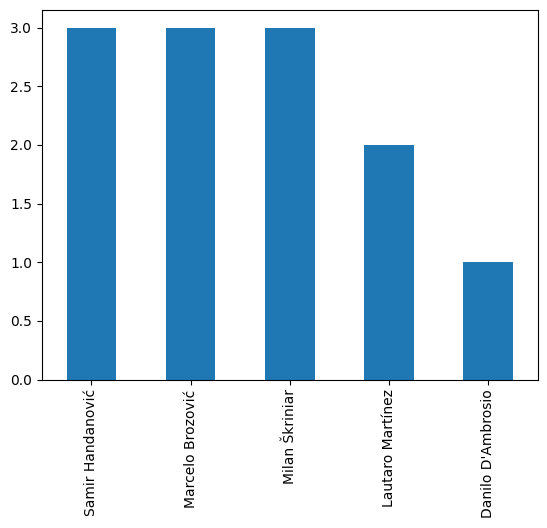

In [50]:
interteam1.Captain.value_counts().plot(kind='bar')

City have won a majority of games under the captaincy of Gundogan and have a higher chance of winning with him as the captain

<Axes: >

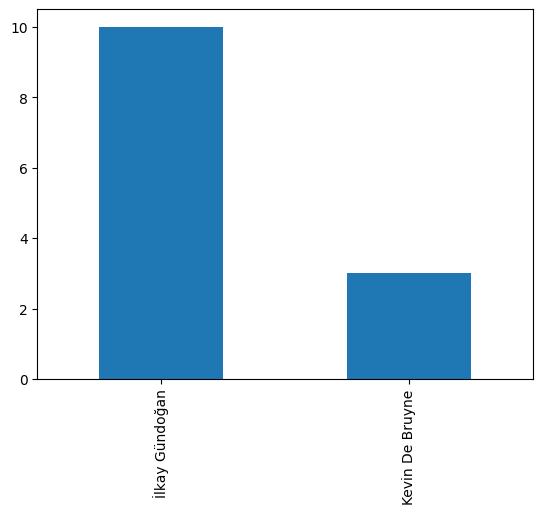

In [51]:
cityteam1.Captain.value_counts().plot(kind='bar')

InterMilan have won whenever they have fielded a 3-5-2 formation

<Axes: >

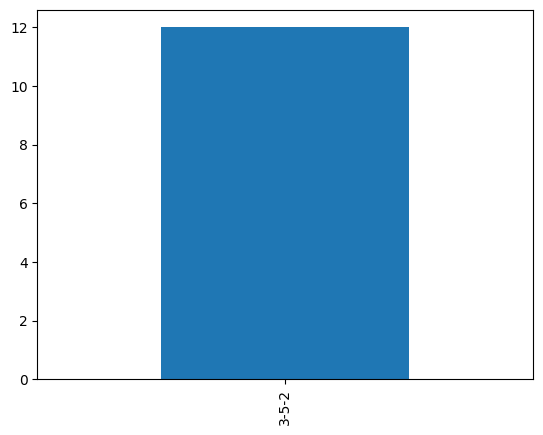

In [52]:
interteam1.Formation.value_counts().plot(kind='bar')

City have deployed a variety of formations in their games having emerged most victorious in their 4-3-3 and 3-2-4-1 formations

<Axes: >

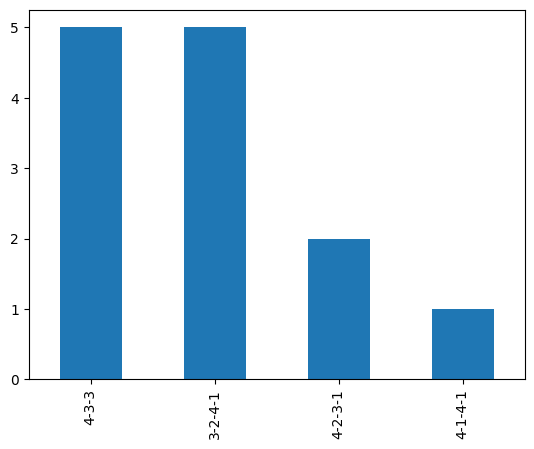

In [53]:
cityteam1.Formation.value_counts().plot(kind='bar')

# Model


In [54]:
columns = ["GA", "GF", "xGA", "Gls", "Result"]
new_inter = interteam.copy()
new_city = cityteam.copy()
new_city = new_city[columns]
new_inter = new_inter[columns]
new_inter['id'] = [1 for _ in range(len(interteam))]
new_city['id'] = [2 for _ in range(len(cityteam))]

Created a combined df for ManCity and InterMilan and gave them separate id values

In [55]:
combined = pd.concat([new_inter, new_city])

In [56]:
combined

GA   GF       xGA  Gls Result  id
0   1.0  2.0  0.700000    2      W   1
2   3.0  1.0  1.100000    1      L   1
4   3.0  2.0  1.300000    2      L   1
7   0.0  2.0  0.300000    2      W   1
8   3.0  1.0  1.600000    1      L   1
11  1.0  2.0  1.200000    2      W   1
12  3.0  3.0  2.200000    3      D   1
14  3.0  4.0  1.300000    4      W   1
17  2.0  0.0  1.500000    0      L   1
18  2.0  0.0  0.900000    0      L   1
20  2.0  3.0  1.800000    2      W   1
22  2.0  2.0  1.500000    2      D   1
25  0.0  3.0  1.008163    3      W   1
27  1.0  2.0  1.000000    2      W   1
30  0.0  0.0  0.500000    0      D   1
33  1.0  0.0  1.200000    0      L   1
35  2.0  1.0  1.000000    1      L   1
36  0.0  0.0  1.700000    0      D   1
39  1.0  1.0  1.008163    1      D   1
40  1.0  1.0  1.100000    1      D   1
41  0.0  2.0  1.600000    2      W   1
44  0.0  3.0  0.900000    3      W   1
47  0.0  6.0  0.500000    5      W   1
48  0.0  2.0  0.900000    2      W   1
49  0.0  2.0  0.900000    2      W   1
52  3.0  1.0  1.700000    1      L   1
1   0.0  2.0  0.500000    2      W   2
3   3.0  3.0  1.800000    3      D   2
6   1.0  1.0  0.300000    1      D   2
7   0.0  4.0  0.300000    4      W   2
9   0.0  3.0  0.400000    3      W   2
13  0.0  0.0  0.300000    0      D   2
14  1.0  0.0  2.100000    0      L   2
16  0.0  0.0  1.200000    0      D   2
17  0.0  1.0  0.700000    1      W   2
23  1.0  3.0  0.600000    3      W   2
25  0.0  1.0  0.400000    1      W   2
27  2.0  0.0  0.824000    0      L   2
28  2.0  1.0  1.700000    1      L   2
32  1.0  0.0  1.400000    0      L   2
34  1.0  3.0  1.600000    3      W   2
35  1.0  1.0  0.900000    1      D   2
36  1.0  1.0  0.800000    1      D   2
37  1.0  4.0  1.000000    3      W   2
38  0.0  3.0  0.824000    3      W   2
40  0.0  1.0  0.200000    1      W   2
44  1.0  4.0  0.400000    4      W   2
47  1.0  1.0  2.200000    1      D   2
50  1.0  2.0  0.200000    2      W   2
53  1.0  1.0  0.700000    1      D   2
54  0.0  3.0  1.600000    3      W   2
57  1.0  1.0  2.200000    1      D   2
58  1.0  0.0  1.300000    0      L   2

Removed 'id' and 'Result' columns for splitting. Taken rest as Independant data and 'Result' column as dependant data.

In [57]:
X = combined.drop(["id", "Result"], axis = 1)
y = combined.sort_values(by='id')['Result']

In [58]:
from sklearn.model_selection import train_test_split as TTS
from sklearn.preprocessing import LabelEncoder


In [59]:
lab_enc = LabelEncoder()
lab_enc = lab_enc.fit(y)
y_enc = lab_enc.transform(y)

For testing the dataset

In [60]:
X_t = combined.drop(["Result"], axis = 1)
X_train_p, X_test_p, y_train_p, y_test_p = TTS(X_t, y_enc, train_size=0.8, random_state=42)

For training and validation

In [61]:
X_train, X_test, y_train, y_test = TTS(X, y_enc, train_size=0.8, random_state=42)

Xgboost is an optimised and efficient gradient boosting model. It provides pre boosting methods like random forest and ensemble methods.

In [62]:
import xgboost as xgb

In [63]:
d_train = xgb.DMatrix(X_train, y_train)
d_test = xgb.DMatrix(X_test, y_test)

In [64]:
params = {
    'booster': 'gbtree',
    'max_depth': 5, 
    'learning_rate': 0.025,
    'min_split_loss': 0.01,
    'min_child_weight': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.25,
    'alpha': 2,
    'lambda': 3,
    'objective': 'multi:softprob',
    'num_class': 3,
    'eval_metric':'mlogloss'
}
rounds = 1000
evallist = [(d_train, 'train'), (d_test, 'eval')]

In [65]:
bst = xgb.train(params, d_train, rounds, evallist, early_stopping_rounds=20)

[0]	train-mlogloss:1.09861	eval-mlogloss:1.09861
[1]	train-mlogloss:1.09861	eval-mlogloss:1.09861
[2]	train-mlogloss:1.09832	eval-mlogloss:1.09774
[3]	train-mlogloss:1.09832	eval-mlogloss:1.09774
[4]	train-mlogloss:1.09811	eval-mlogloss:1.09750
[5]	train-mlogloss:1.09741	eval-mlogloss:1.09714
[6]	train-mlogloss:1.09737	eval-mlogloss:1.09708
[7]	train-mlogloss:1.09716	eval-mlogloss:1.09613
[8]	train-mlogloss:1.09701	eval-mlogloss:1.09528
[9]	train-mlogloss:1.09644	eval-mlogloss:1.09496
[10]	train-mlogloss:1.09604	eval-mlogloss:1.09449
[11]	train-mlogloss:1.09562	eval-mlogloss:1.09423
[12]	train-mlogloss:1.09455	eval-mlogloss:1.09316
[13]	train-mlogloss:1.09426	eval-mlogloss:1.09209
[14]	train-mlogloss:1.09364	eval-mlogloss:1.09172
[15]	train-mlogloss:1.09341	eval-mlogloss:1.09100
[16]	train-mlogloss:1.09321	eval-mlogloss:1.09101
[17]	train-mlogloss:1.09314	eval-mlogloss:1.09059
[18]	train-mlogloss:1.09265	eval-mlogloss:1.09024
[19]	train-mlogloss:1.09182	eval-mlogloss:1.09049
[20]	train

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[30]	train-mlogloss:1.08772	eval-mlogloss:1.08489
[31]	train-mlogloss:1.08758	eval-mlogloss:1.08461
[32]	train-mlogloss:1.08753	eval-mlogloss:1.08454
[33]	train-mlogloss:1.08671	eval-mlogloss:1.08429
[34]	train-mlogloss:1.08628	eval-mlogloss:1.08489
[35]	train-mlogloss:1.08620	eval-mlogloss:1.08480
[36]	train-mlogloss:1.08605	eval-mlogloss:1.08481
[37]	train-mlogloss:1.08602	eval-mlogloss:1.08452
[38]	train-mlogloss:1.08591	eval-mlogloss:1.08439
[39]	train-mlogloss:1.08591	eval-mlogloss:1.08439
[40]	train-mlogloss:1.08591	eval-mlogloss:1.08439
[41]	train-mlogloss:1.08575	eval-mlogloss:1.08425
[42]	train-mlogloss:1.08537	eval-mlogloss:1.08399
[43]	train-mlogloss:1.08523	eval-mlogloss:1.08326
[44]	train-mlogloss:1.08482	eval-mlogloss:1.08295
[45]	train-mlogloss:1.08481	eval-mlogloss:1.08289
[46]	train-mlogloss:1.08456	eval-mlogloss:1.08291
[47]	train-mlogloss:1.08430	eval-mlogloss:1.08151
[48]	train-mlogloss:1.08410	eval-mlogloss:1.08125
[49]	train-mlogloss:1.08410	eval-mlogloss:1.08125


In [66]:
bst.best_iteration

48

In [67]:
bst.best_score

1.0812480774792759

After going through first 48 iterations model produces a probability matrix consisting of Wins,Losses and Draws probability

In [68]:
pred = bst.predict(d_test, iteration_range=(0, 49))

In [69]:
pred

array([[0.32001865, 0.33592638, 0.344055  ],
       [0.31980345, 0.33570045, 0.34449604],
       [0.32228634, 0.33480608, 0.3429076 ],
       [0.3174009 , 0.33153066, 0.3510684 ],
       [0.31653303, 0.33195218, 0.35151476],
       [0.3193551 , 0.33200943, 0.34863544],
       [0.3231625 , 0.33437324, 0.3424643 ],
       [0.31965876, 0.33043405, 0.34990716],
       [0.31927153, 0.31658614, 0.3641423 ],
       [0.32228634, 0.33480608, 0.3429076 ],
       [0.3174662 , 0.33293083, 0.34960297]], dtype=float32)

In [70]:
chart = pd.DataFrame(pred,columns=lab_enc.inverse_transform([0,1,2]))
chart['id'] = X_test_p.sort_values(by="id").reset_index()['id']
encoding = {
    1:"InterMilan",
    2:"ManCity"
}
chart['id'].replace(encoding, inplace = True)

In [71]:
chart

D         L         W          id
0   0.320019  0.335926  0.344055  InterMilan
1   0.319803  0.335700  0.344496  InterMilan
2   0.322286  0.334806  0.342908  InterMilan
3   0.317401  0.331531  0.351068  InterMilan
4   0.316533  0.331952  0.351515  InterMilan
5   0.319355  0.332009  0.348635  InterMilan
6   0.323162  0.334373  0.342464     ManCity
7   0.319659  0.330434  0.349907     ManCity
8   0.319272  0.316586  0.364142     ManCity
9   0.322286  0.334806  0.342908     ManCity
10  0.317466  0.332931  0.349603     ManCity

In [72]:
chart_inter = chart.loc[chart['id'] == 'InterMilan"']
chart_inter

Empty DataFrame
Columns: [D, L, W, id]
Index: []

Calculating mean probability of winning the match for InterMilan

In [73]:
chart_inter['W'].mean()

nan

In [74]:
chart_city = chart.loc[chart['id'] == 'ManCity']
chart_city

D         L         W       id
6   0.323162  0.334373  0.342464  ManCity
7   0.319659  0.330434  0.349907  ManCity
8   0.319272  0.316586  0.364142  ManCity
9   0.322286  0.334806  0.342908  ManCity
10  0.317466  0.332931  0.349603  ManCity

Calculating mean probability of winning the match for ManCity

In [75]:
chart_city['W'].mean()

0.34980488

**Hence we can see that the chances of winning the Final between the two teams is slightly in favour of Manchester City *(0.34980488)* whereas the chances of winning for Inter Milan are slightly lower at *(0.34711286)***